## House Price Prediction - Regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read Training CSV file

In [2]:
import os
os.chdir('G:\FROM DESKTOP 11_07_23\ETL Hive\Python\Machine Learning\project')

In [3]:
import pandas as pd
df = pd.read_csv('training_set.csv', na_values=['', 'NA'], keep_default_na=False)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Check missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
m=df.isna().sum()
m

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(1460, 81)

### Remove statistically insignificant features

In [9]:
cat1 = list(df.columns[df.dtypes=='object'])
con1 = list(df.columns[df.dtypes!='object'])

In [10]:
cat1

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
con1

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
df[cat1].describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [13]:
df[con1].describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

### Perform Univariate analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

The term "rc" stands for "run configuration," and rcParams is a dictionary-like object that holds the configuration settings.These parameters control the default behavior and appearance of Matplotlib figures.

In [15]:
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'red'
plt.rcParams['font.size'] = 12

In [16]:
Cat- Countplot

NameError: name 'Cat' is not defined

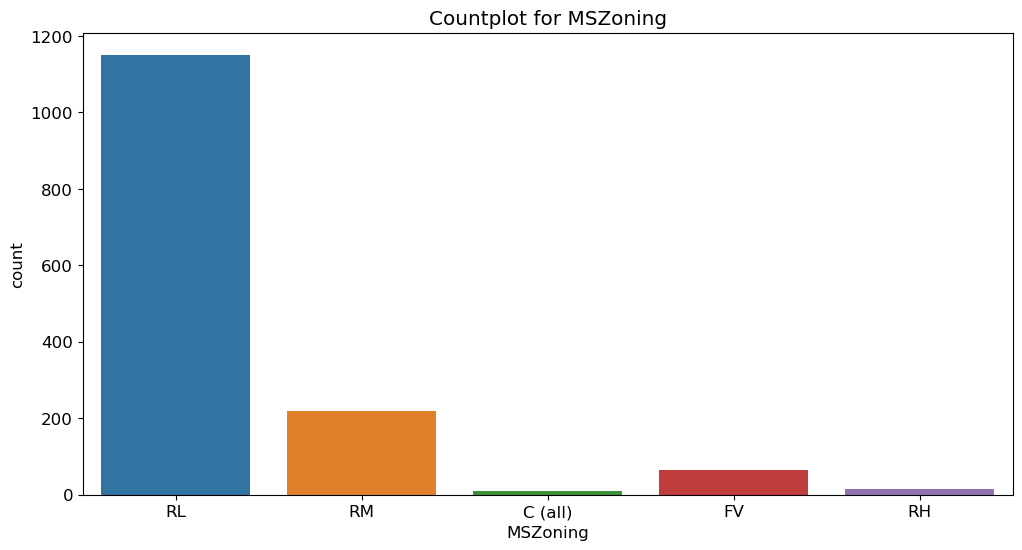

In [17]:
sns.countplot(data=df, x='MSZoning')
plt.title('Countplot for MSZoning')
plt.show()

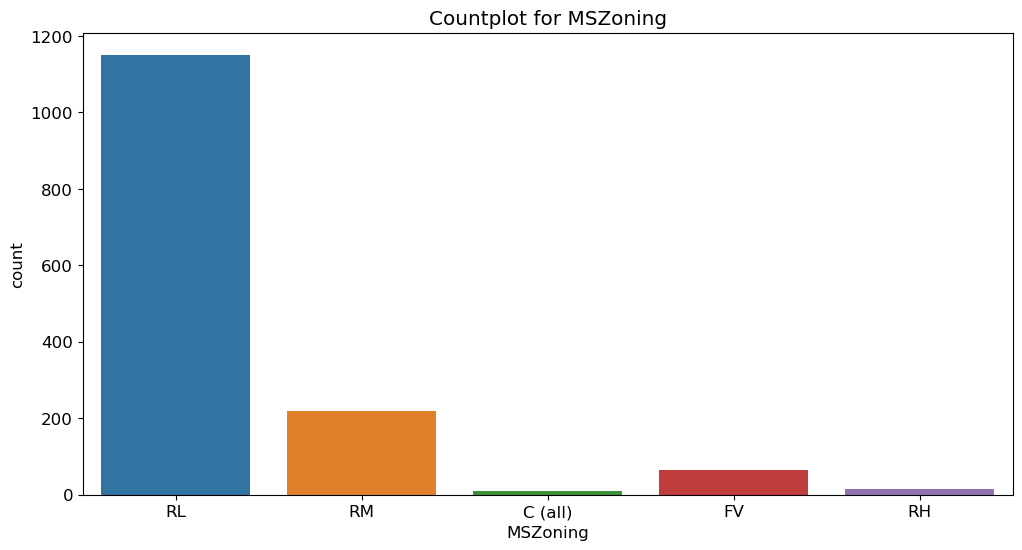

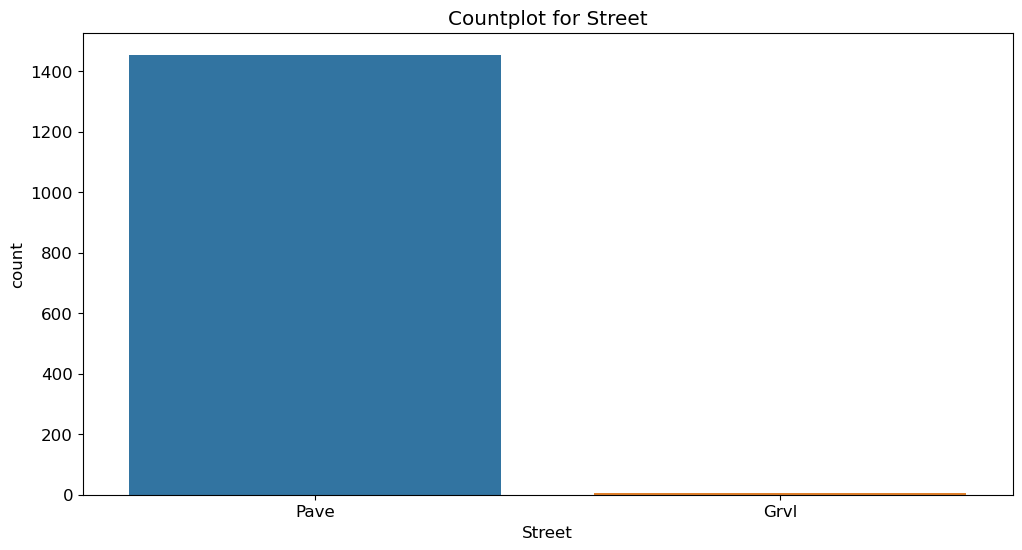

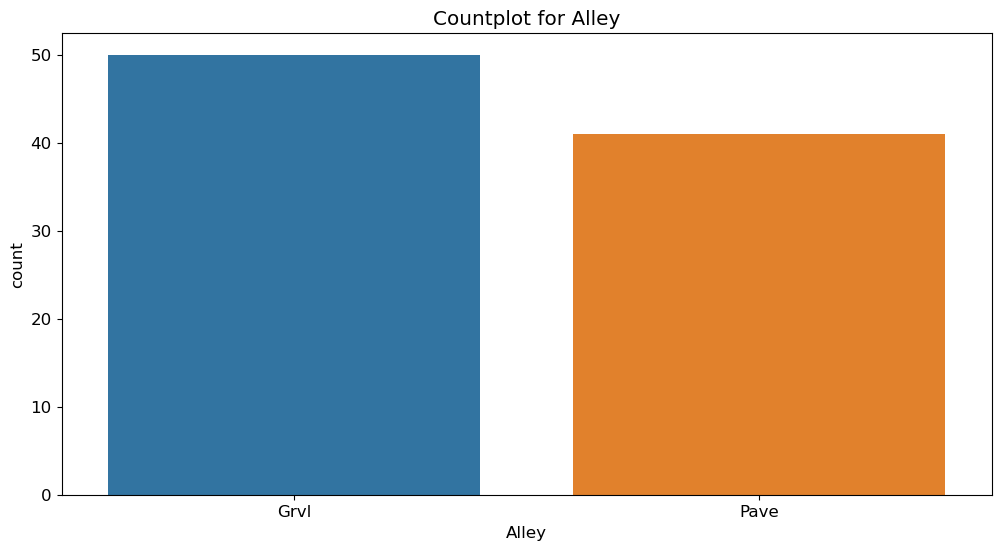

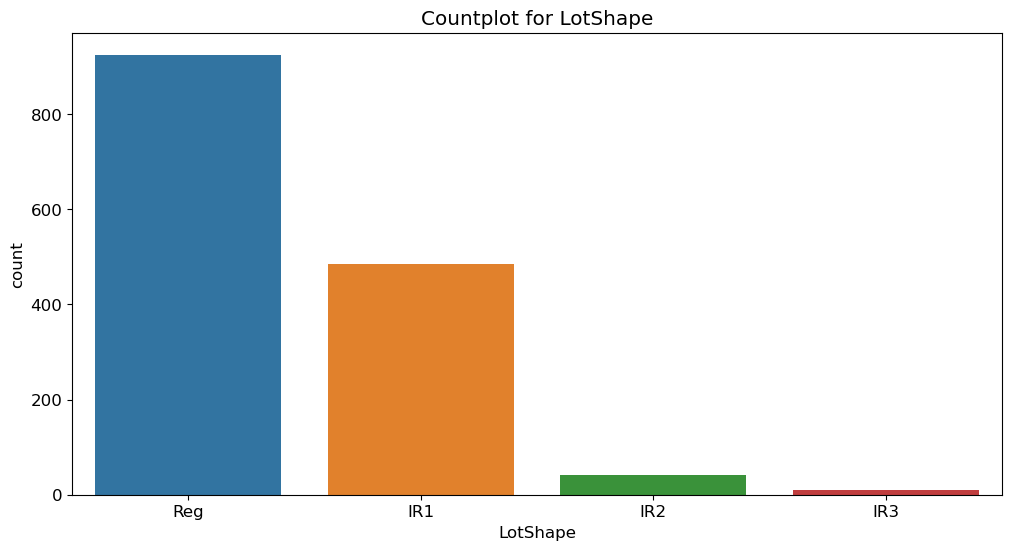

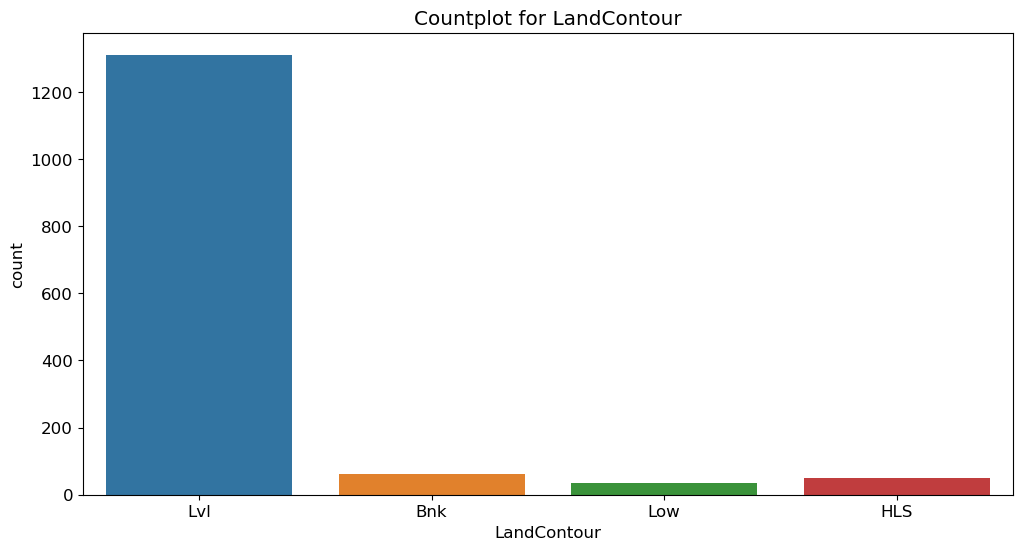

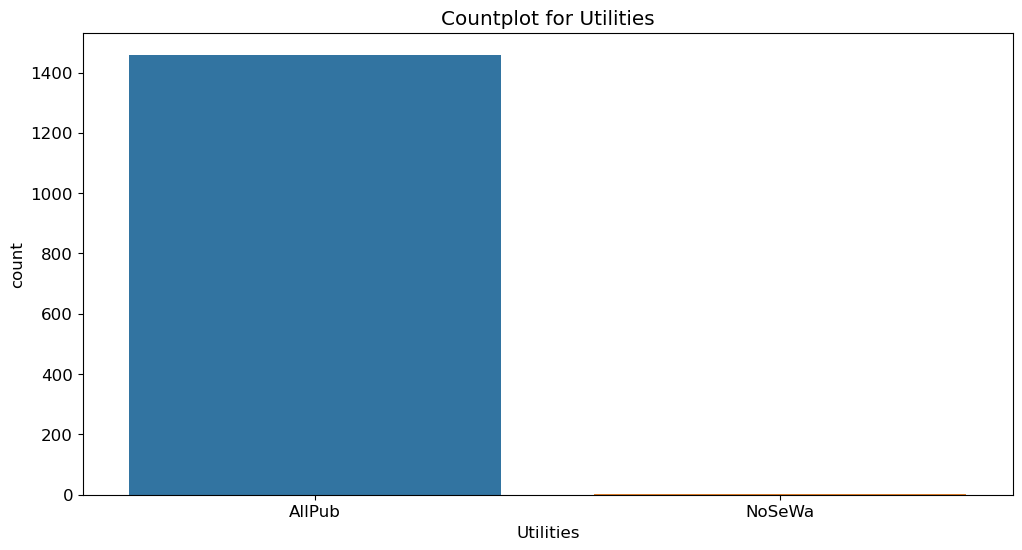

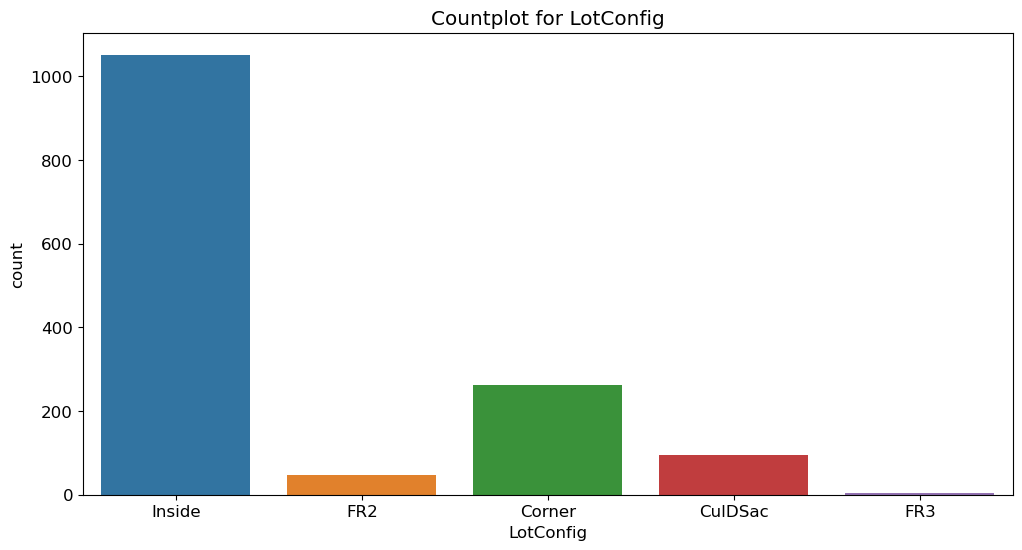

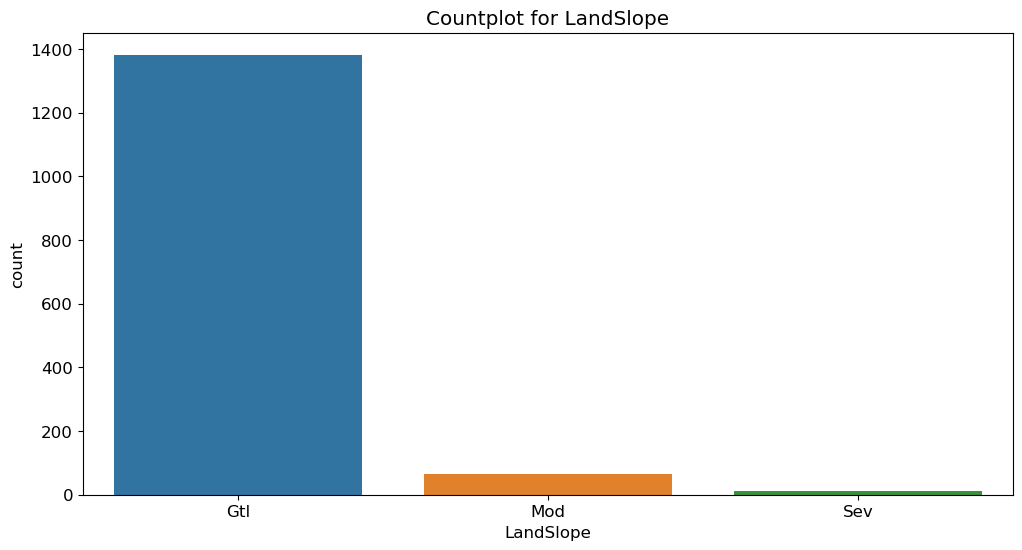

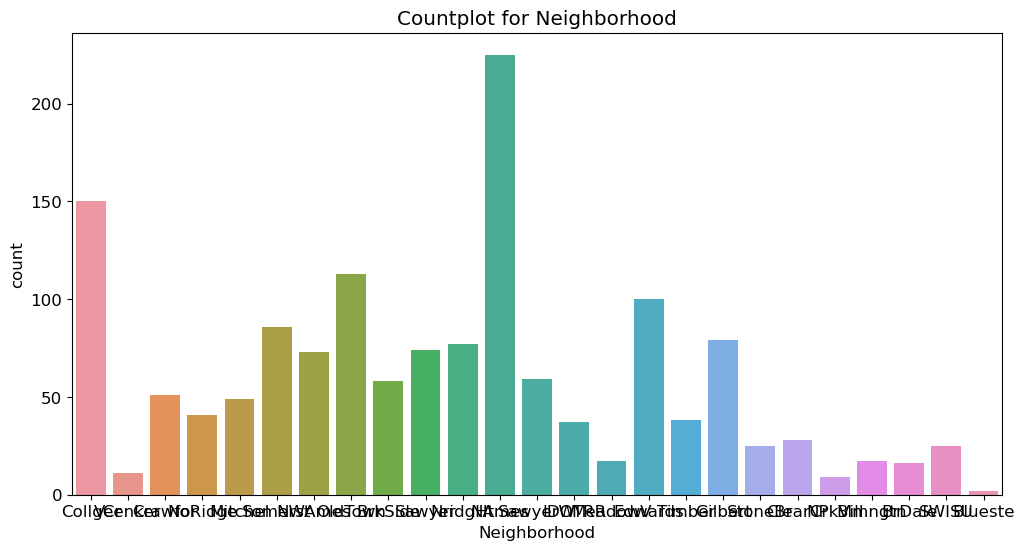

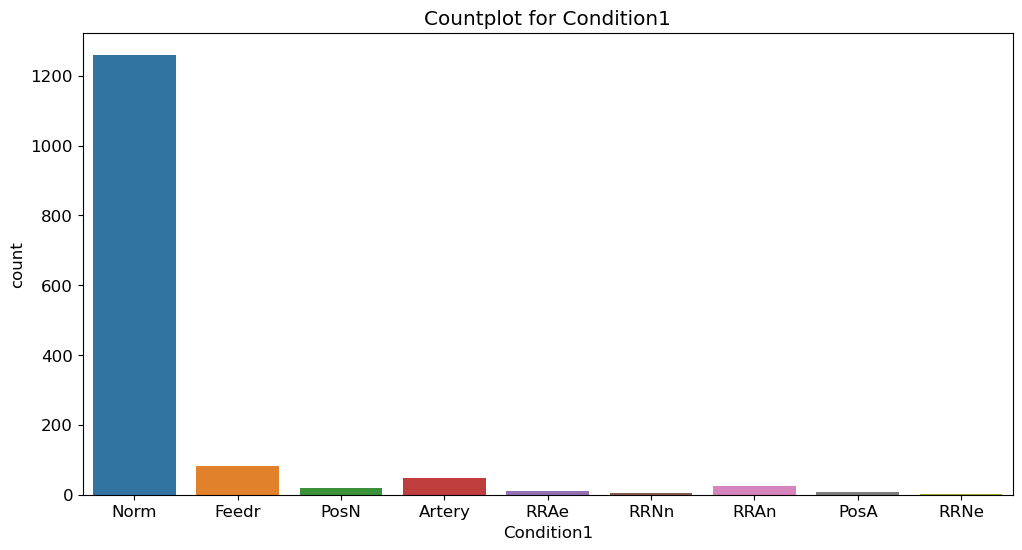

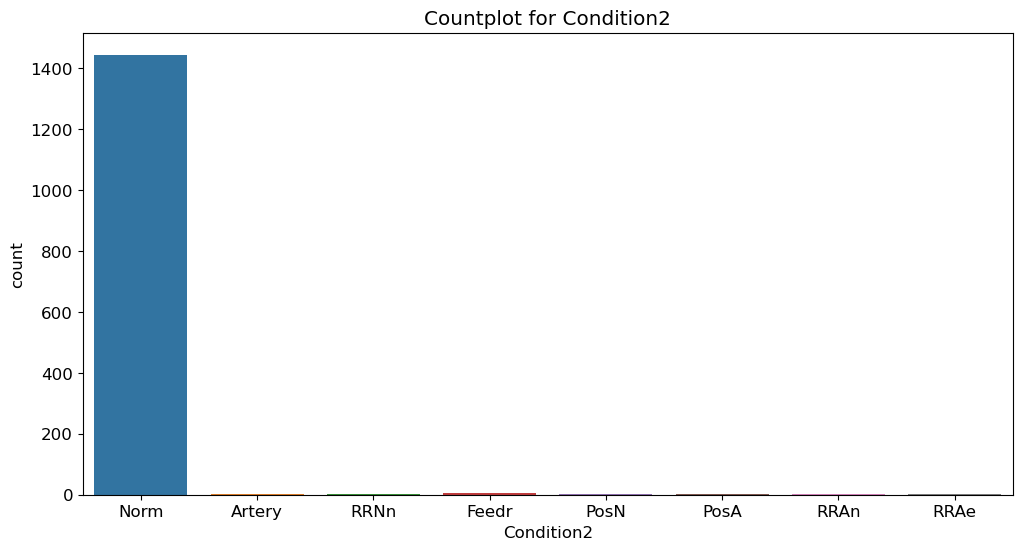

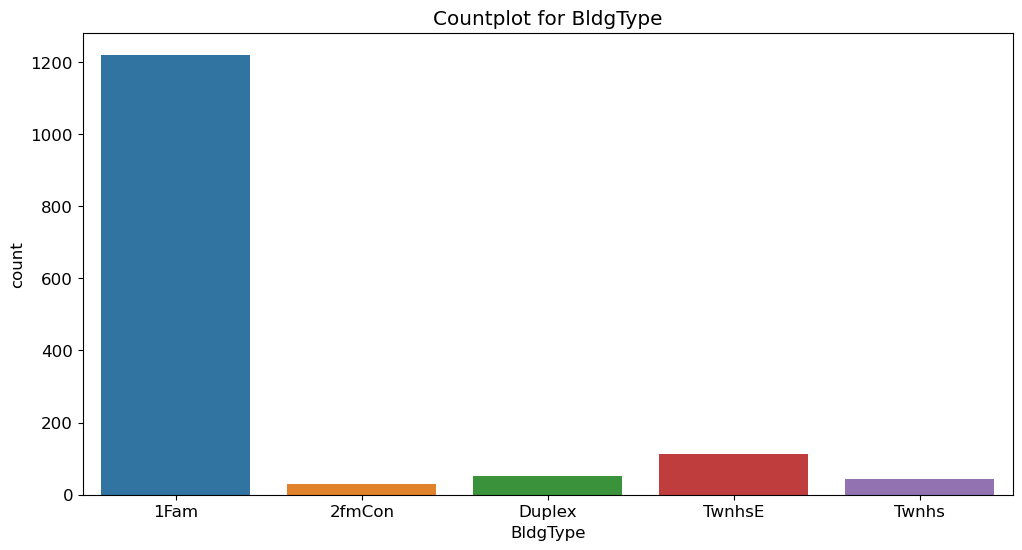

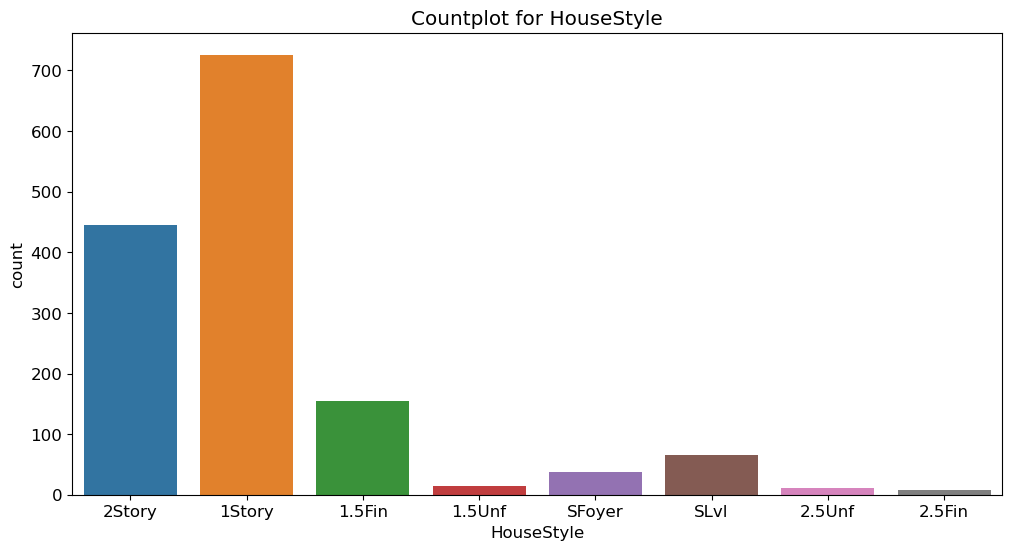

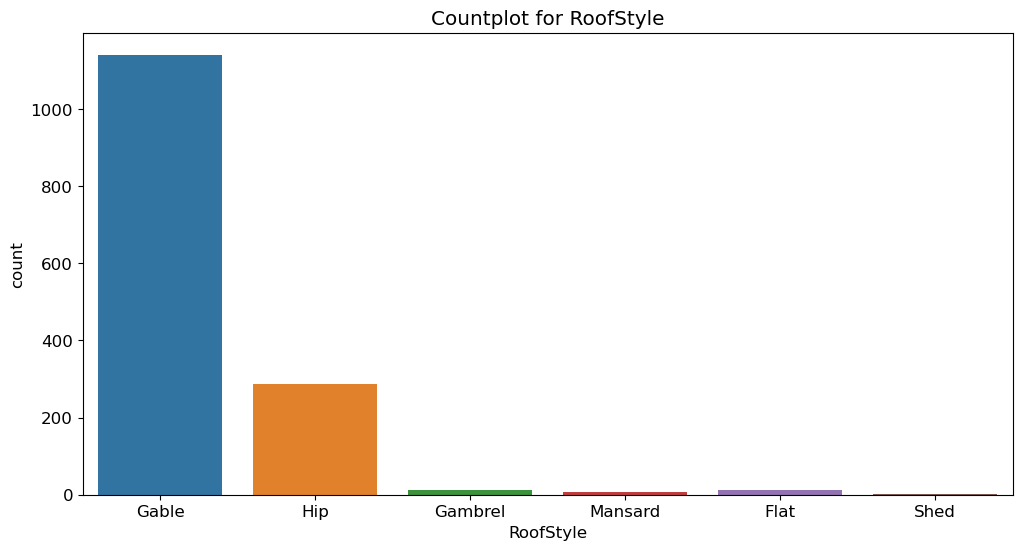

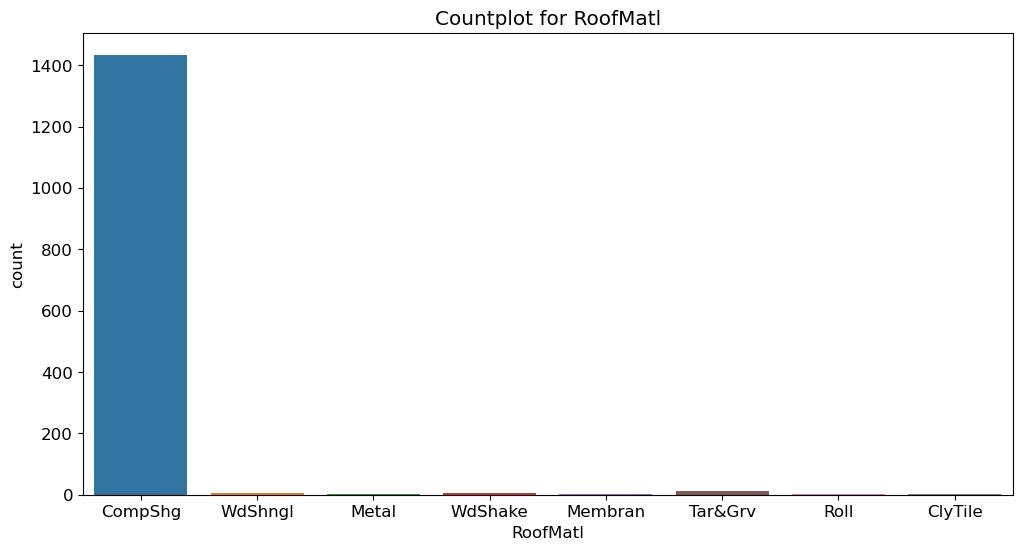

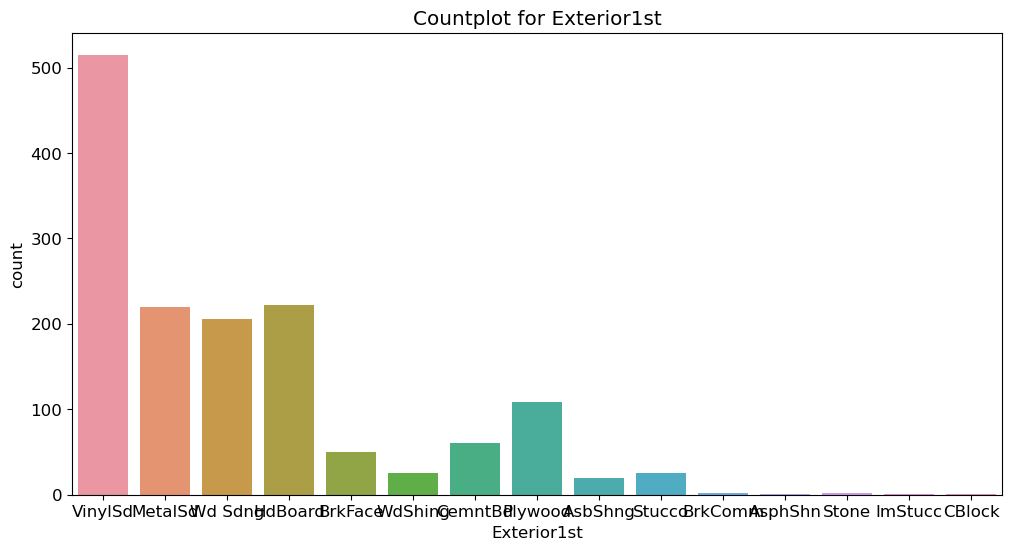

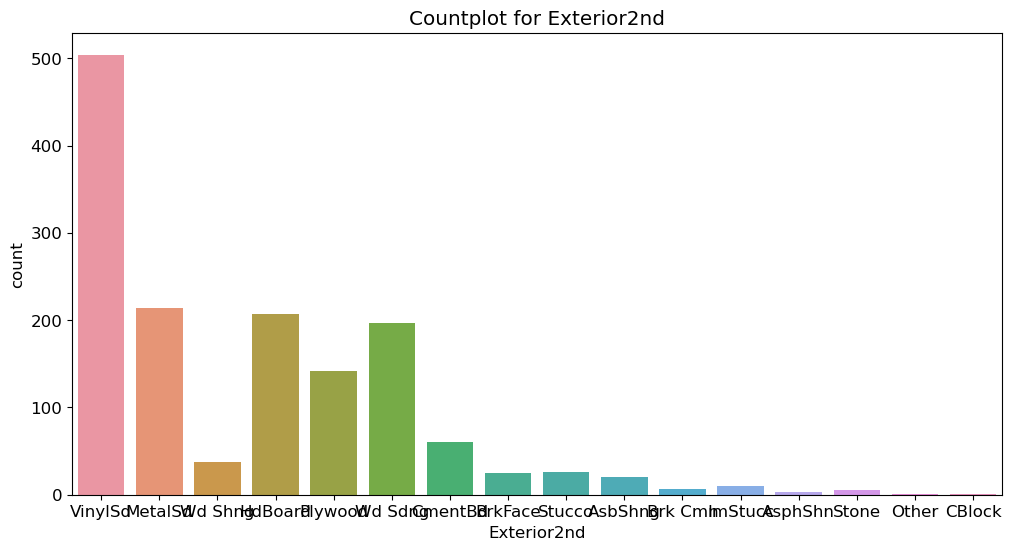

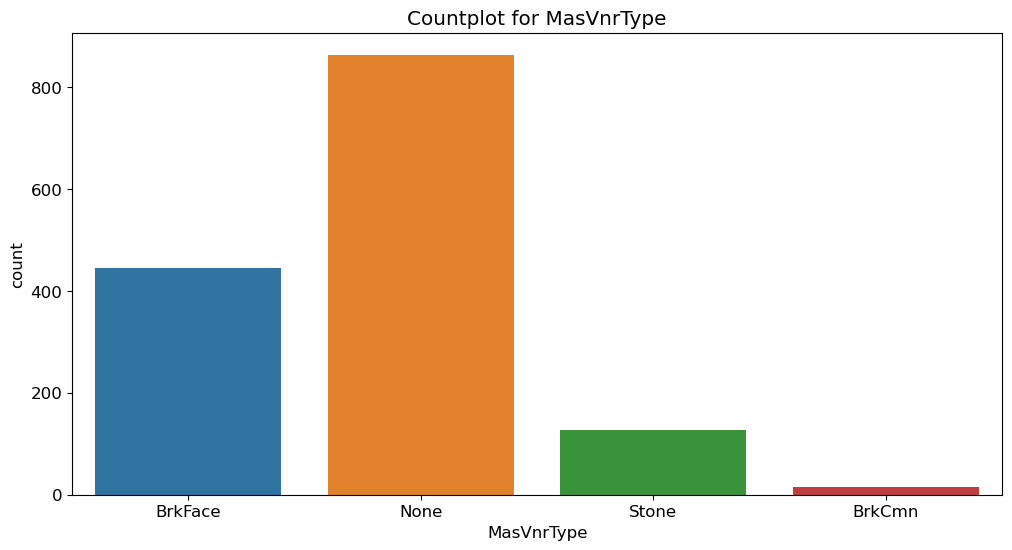

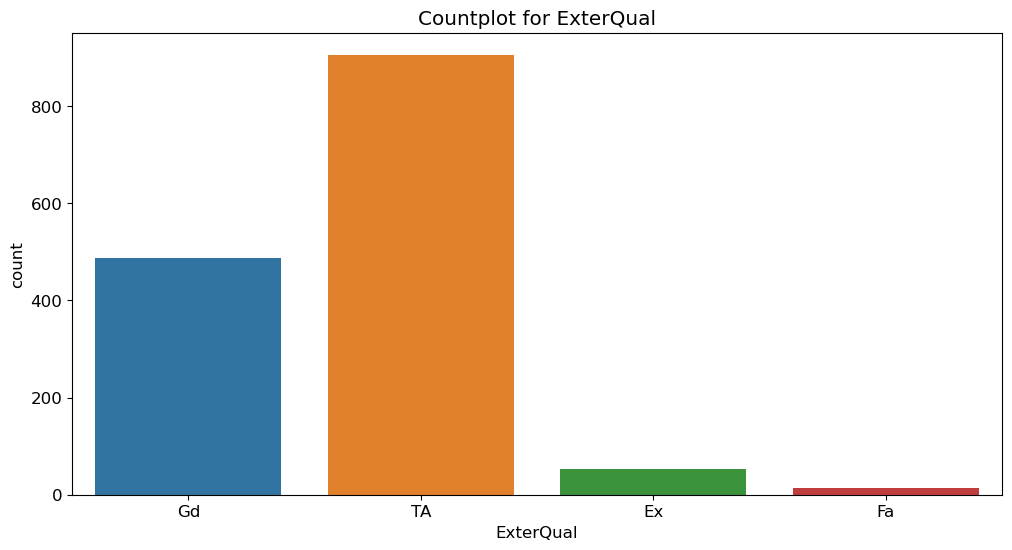

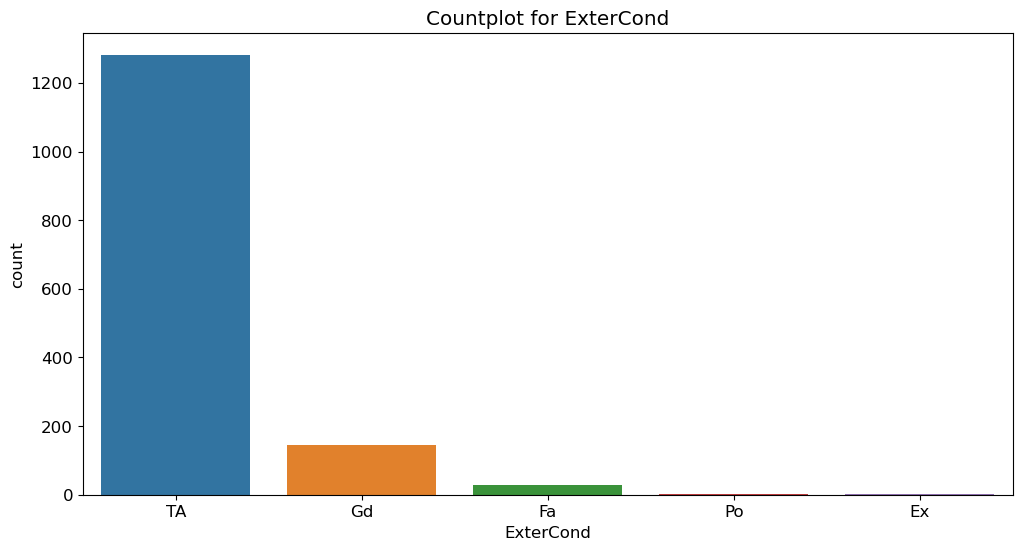

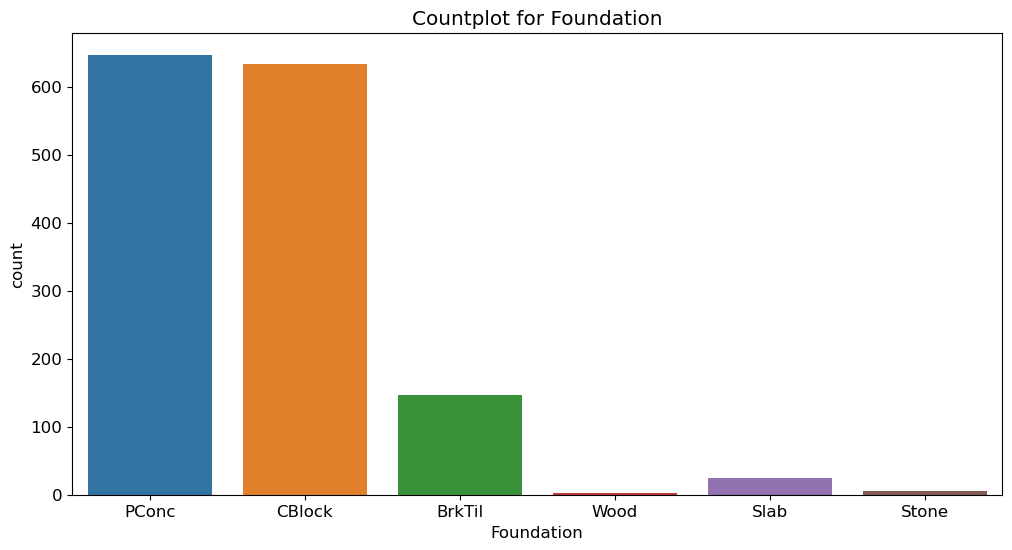

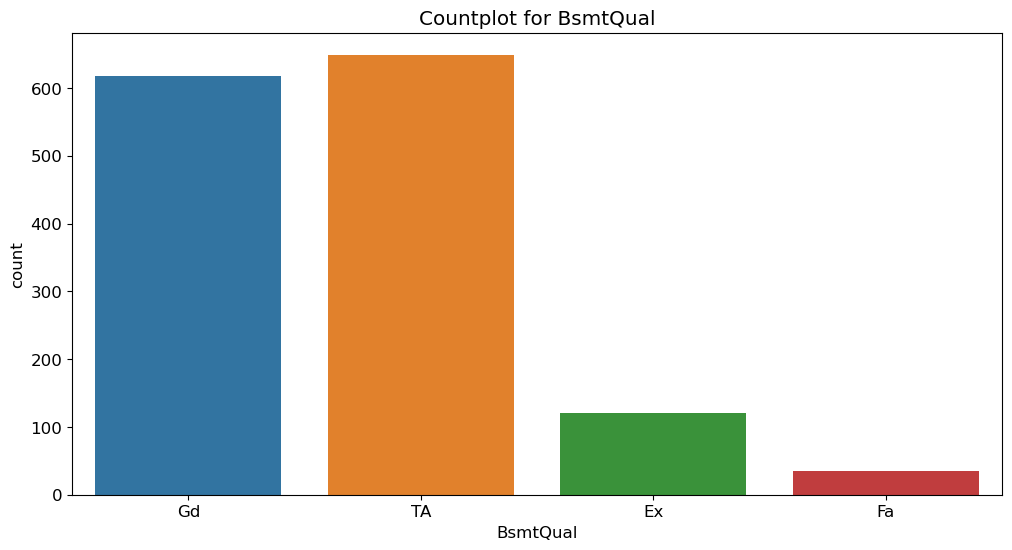

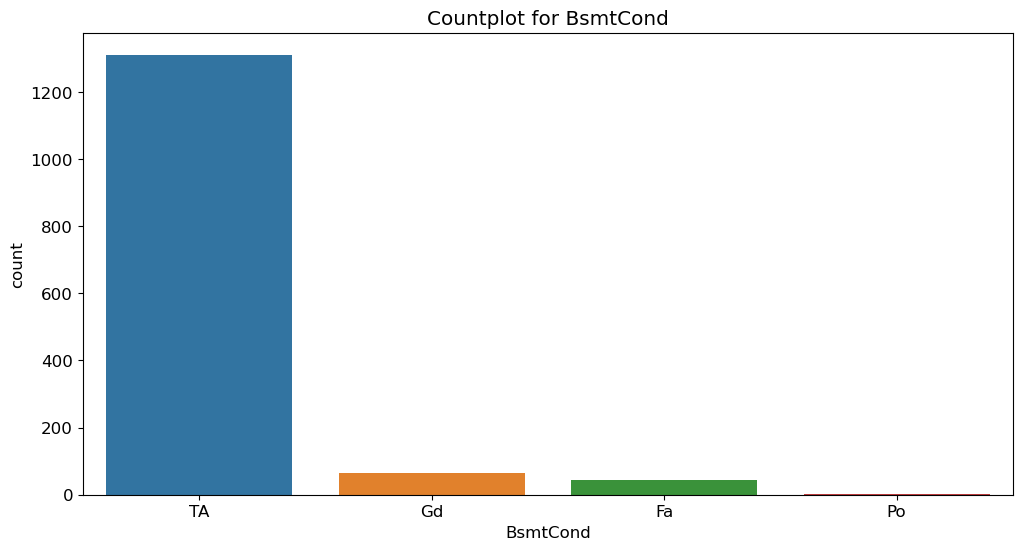

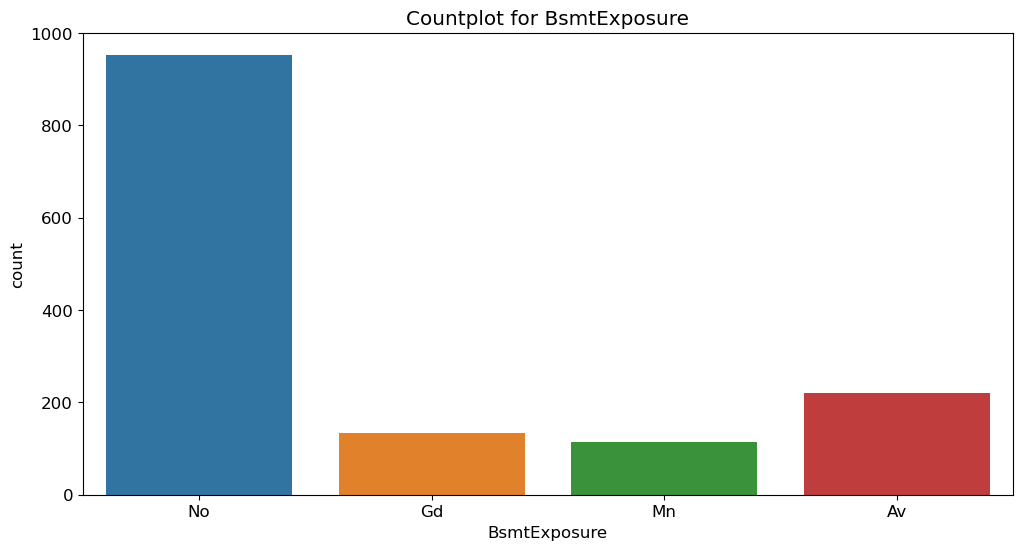

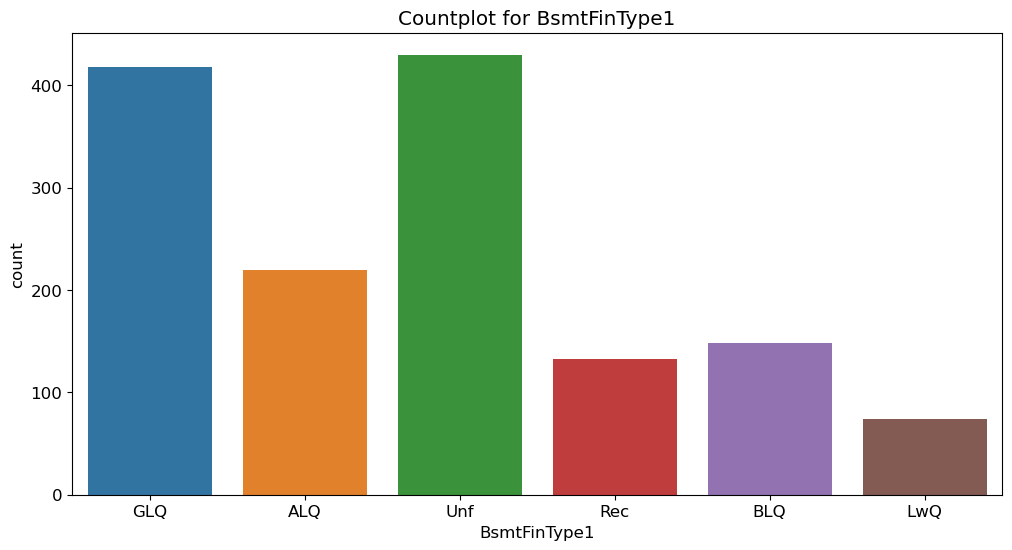

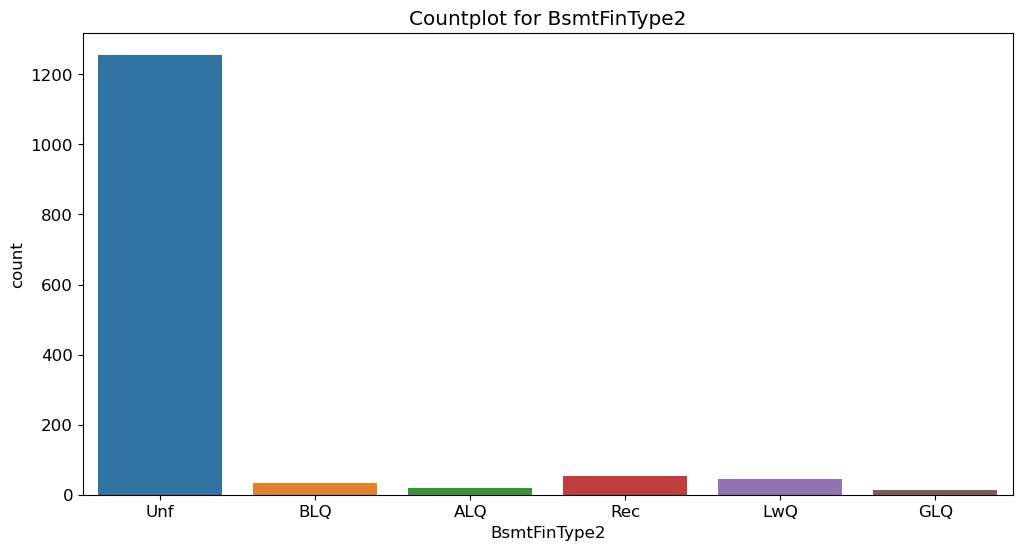

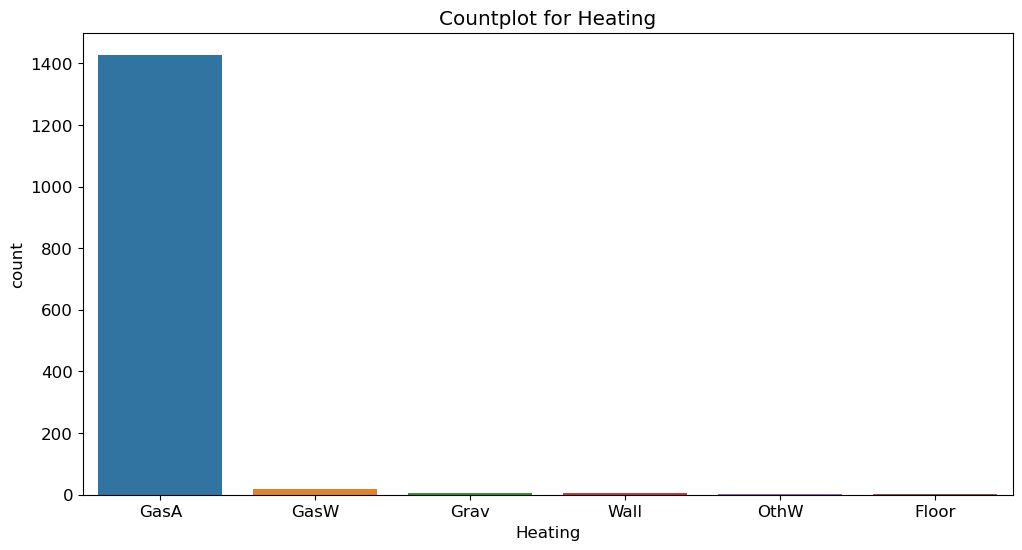

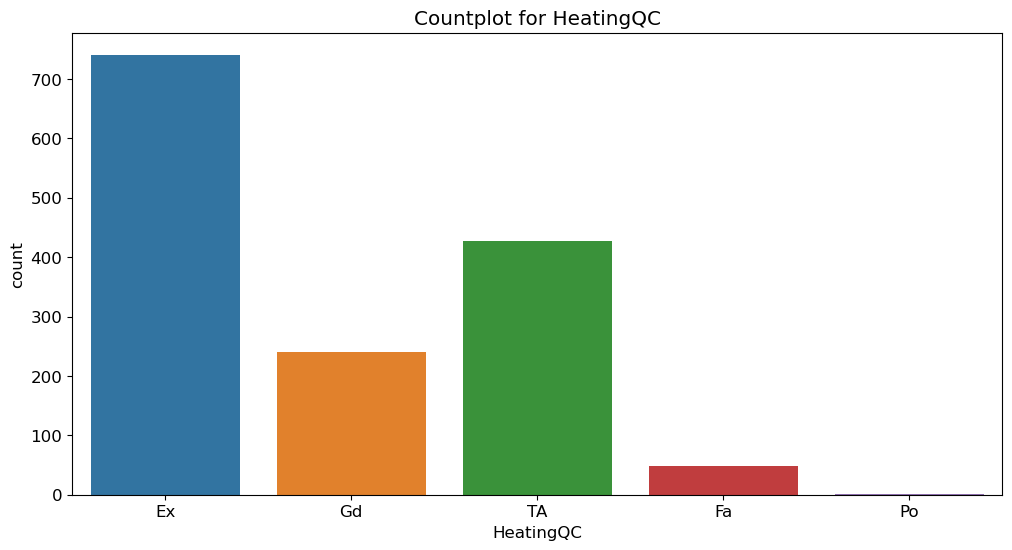

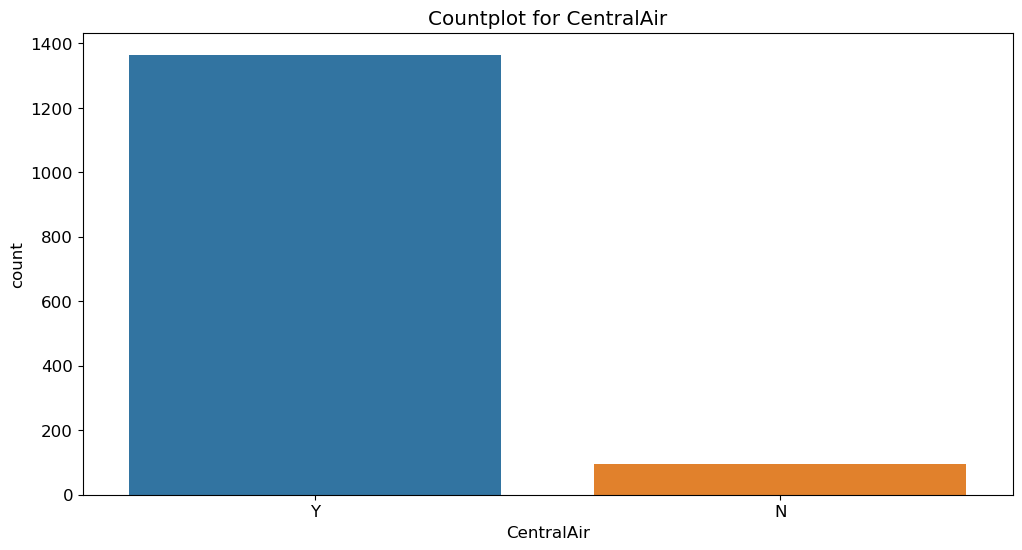

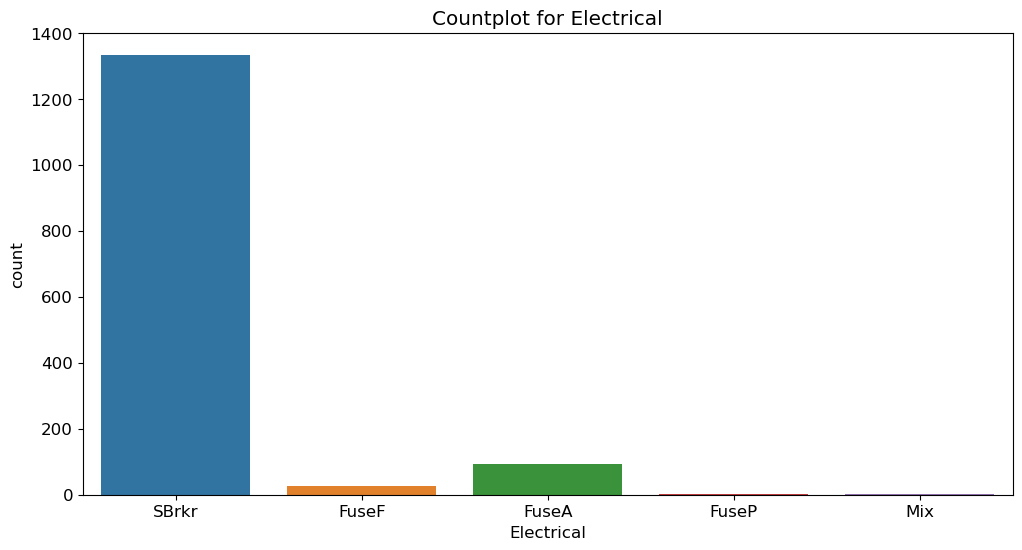

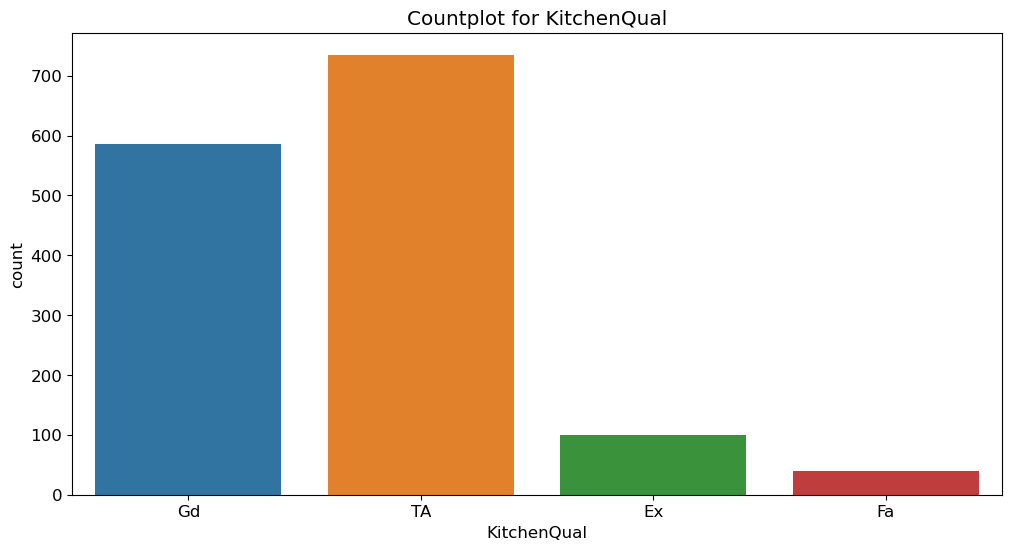

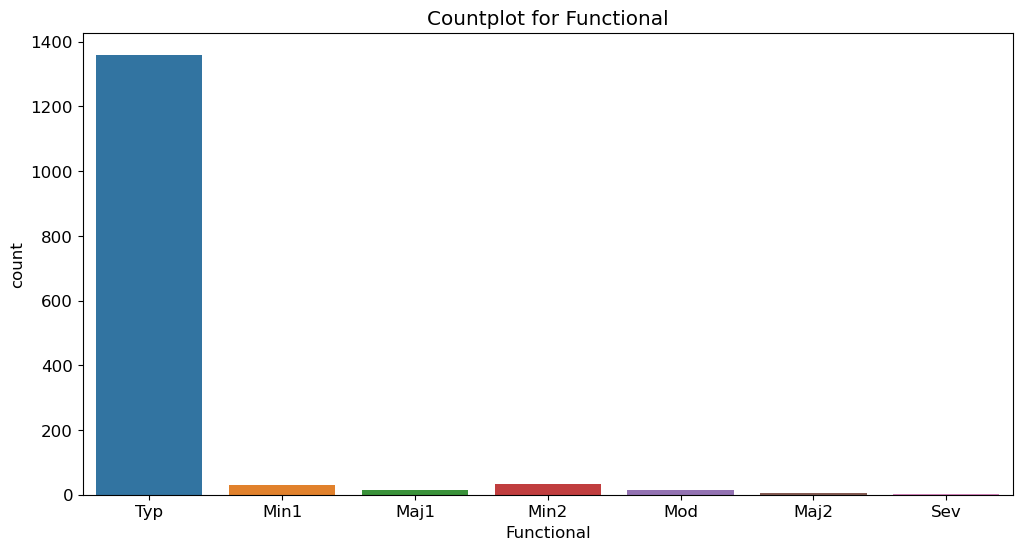

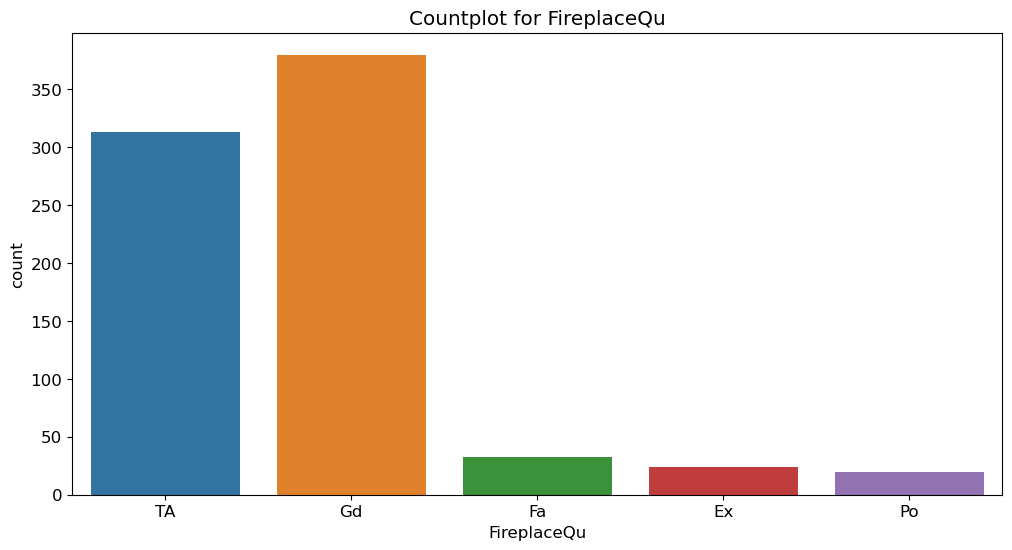

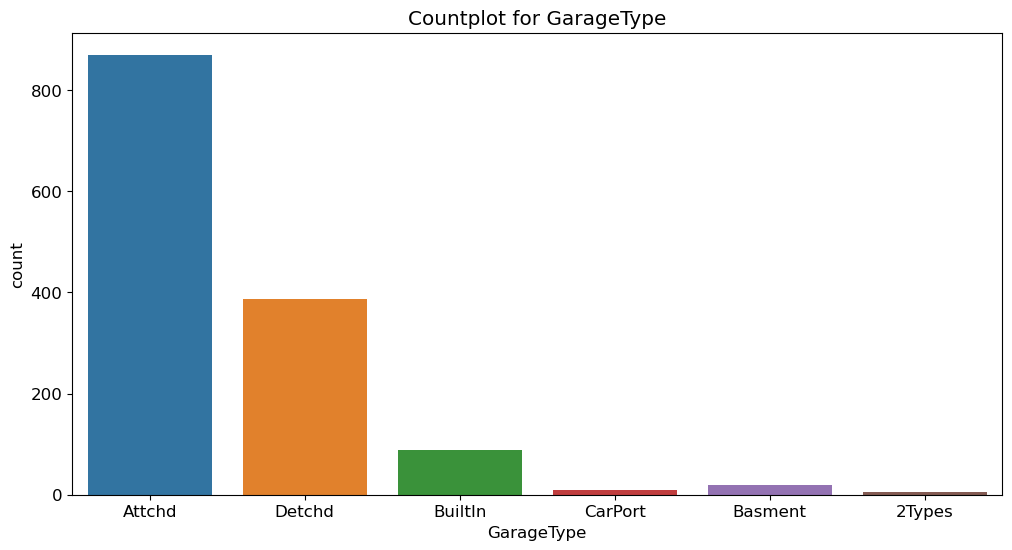

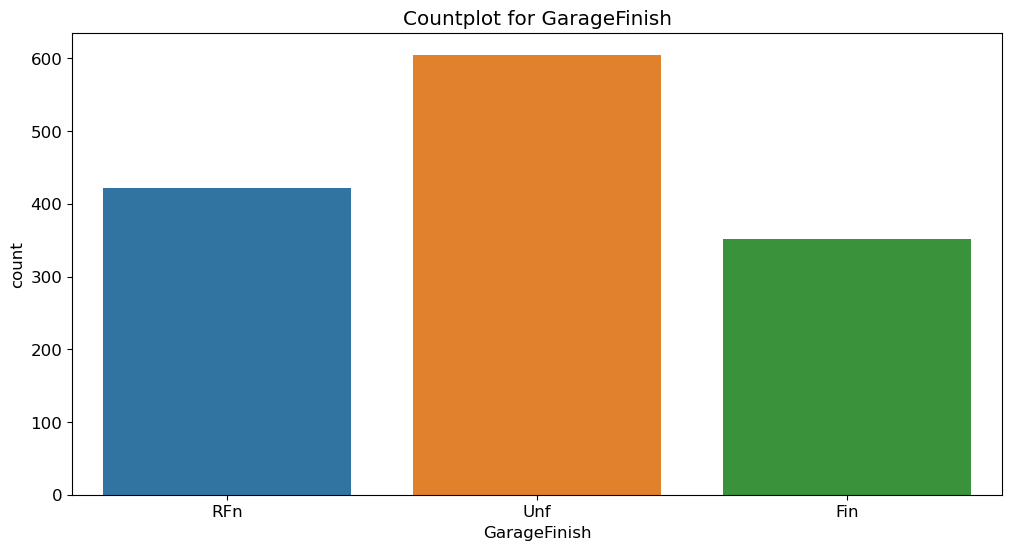

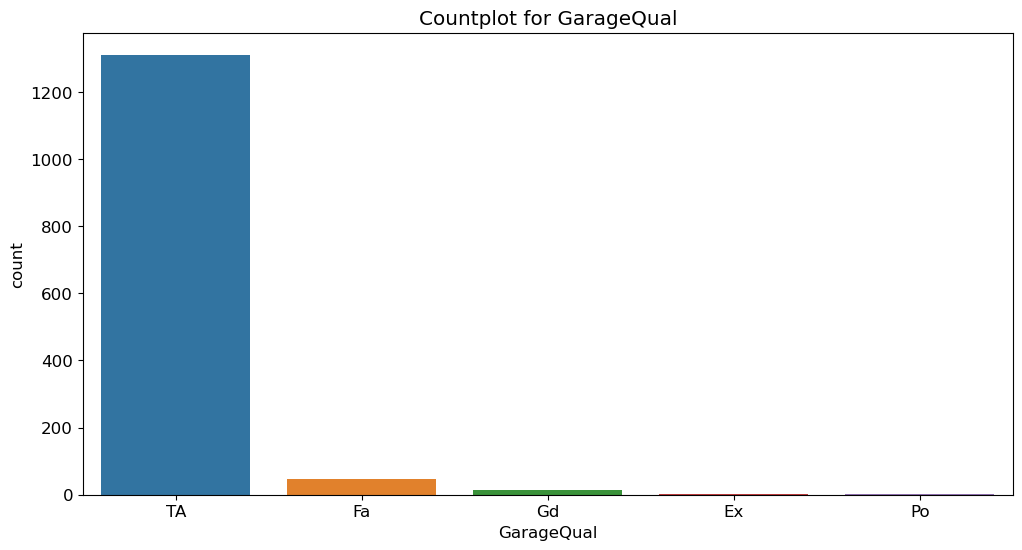

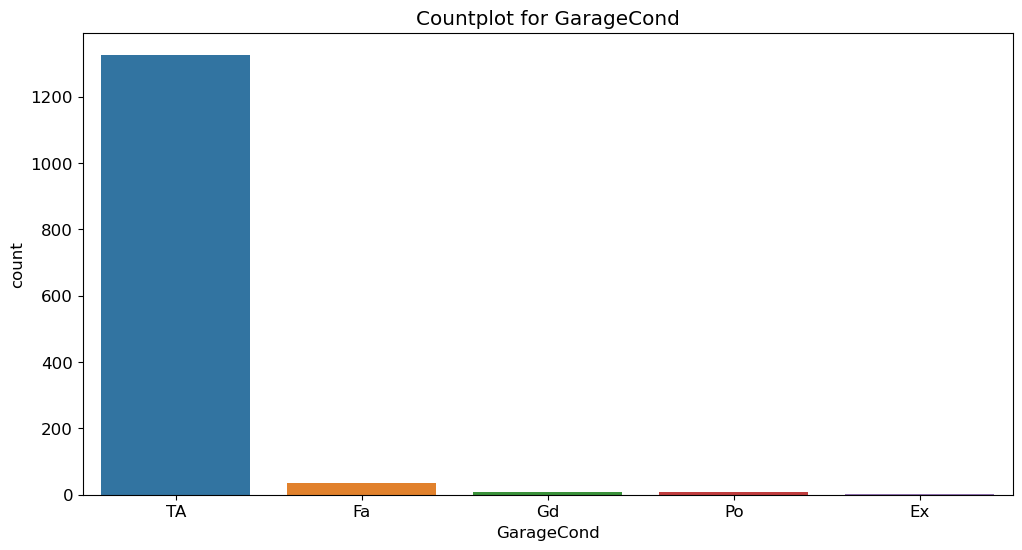

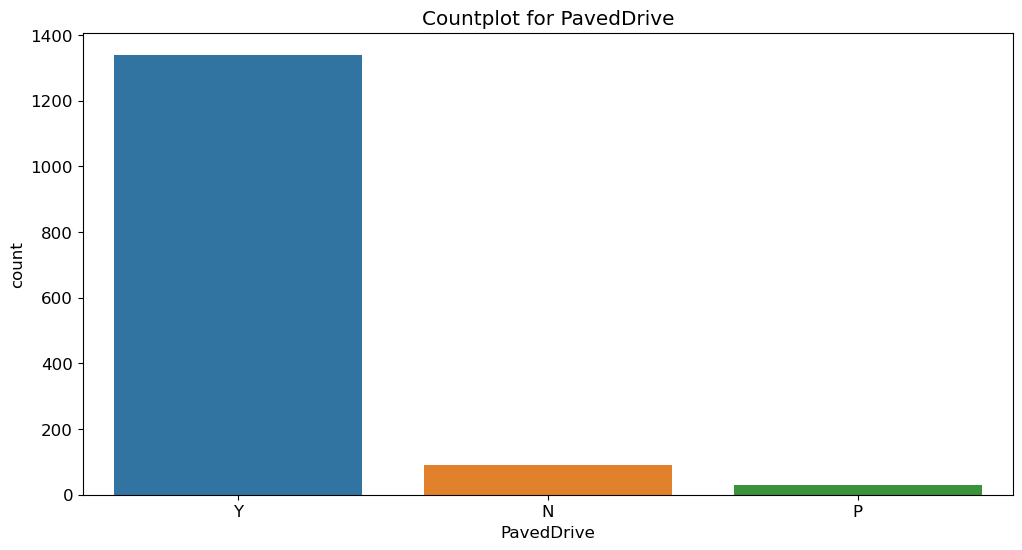

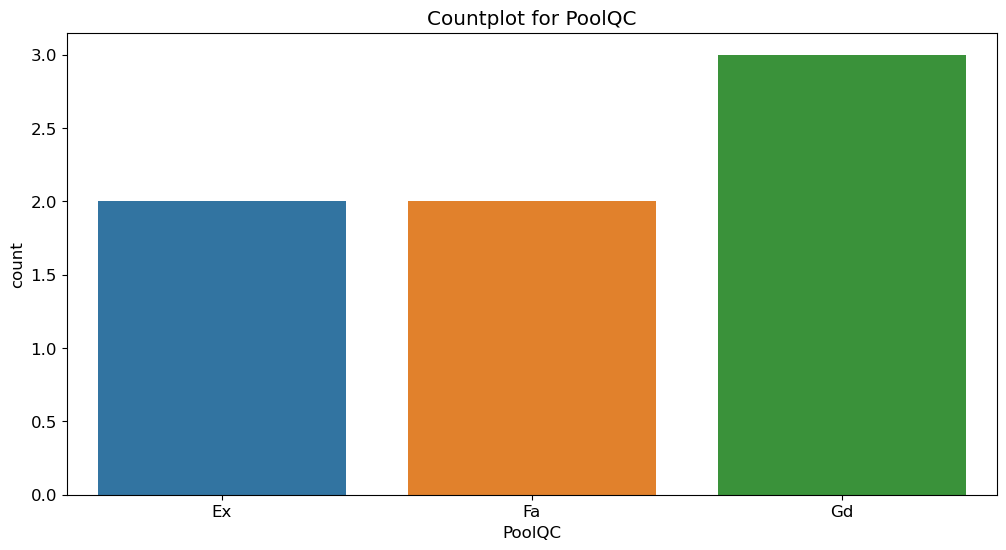

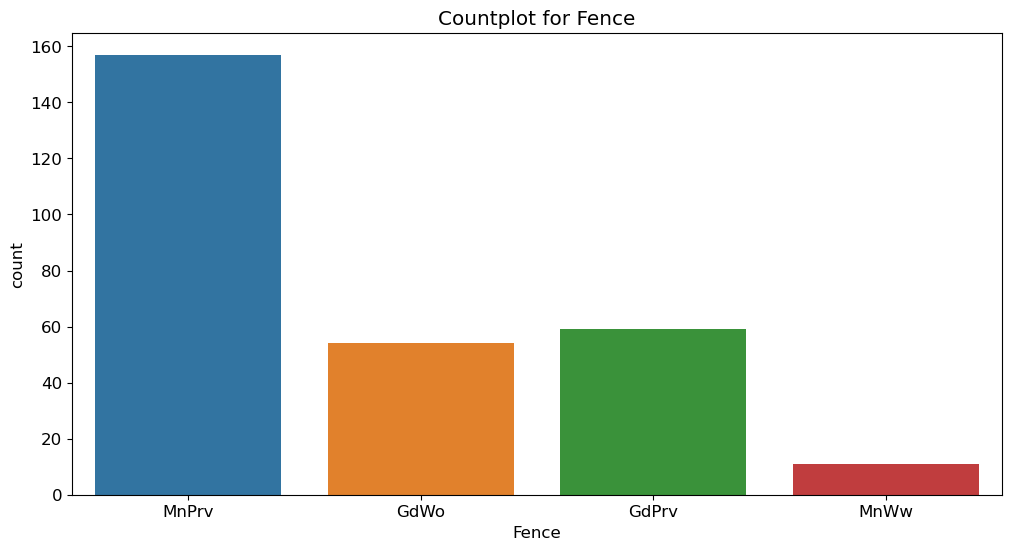

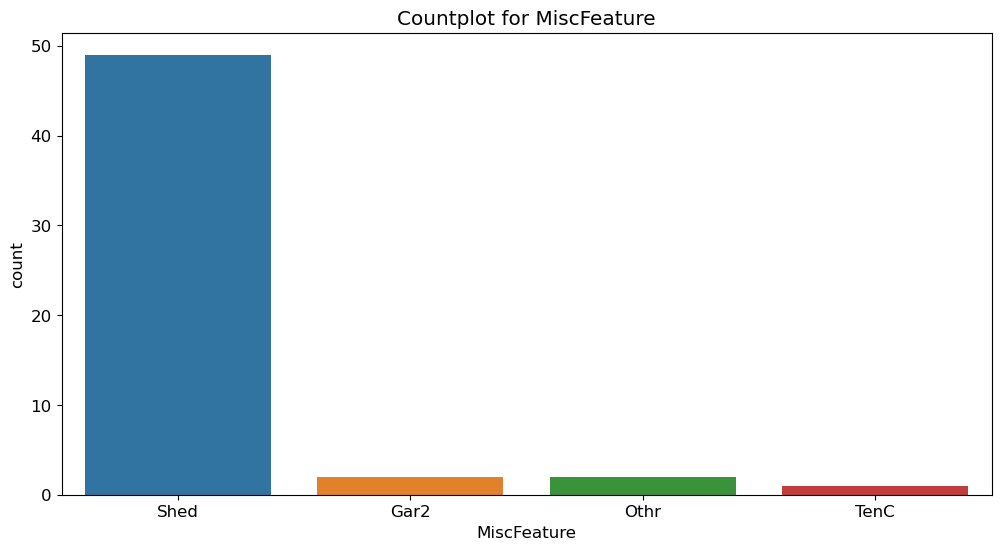

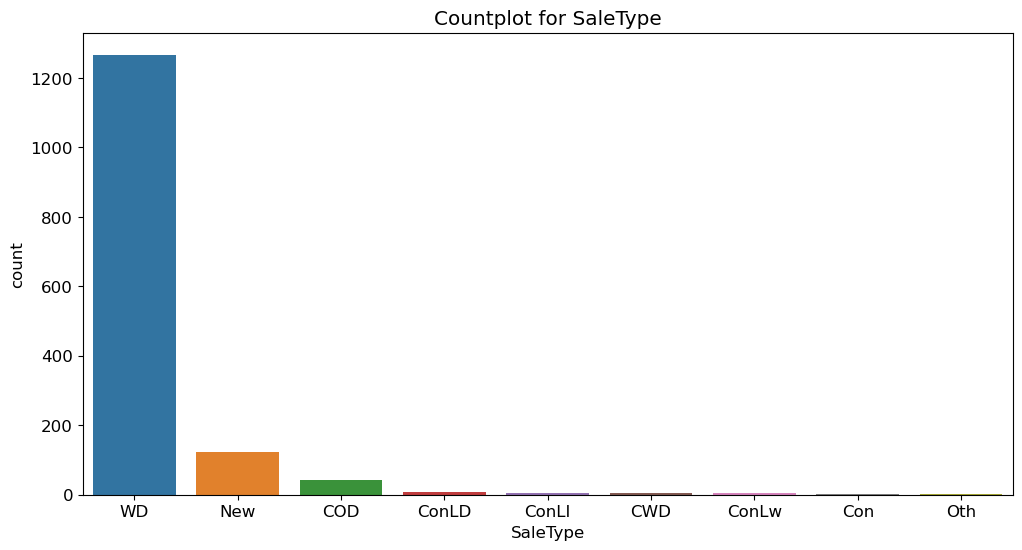

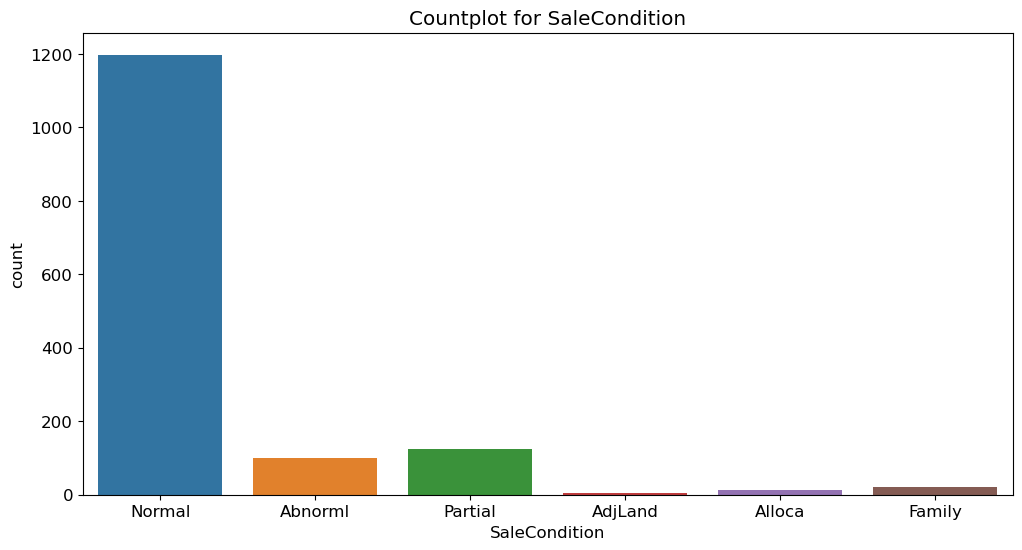

In [18]:
for i in cat1:
    sns.countplot(data=df, x=i)
    plt.title(f'Countplot for {i}')
    plt.show()

### Univariate analysis for continuos feature

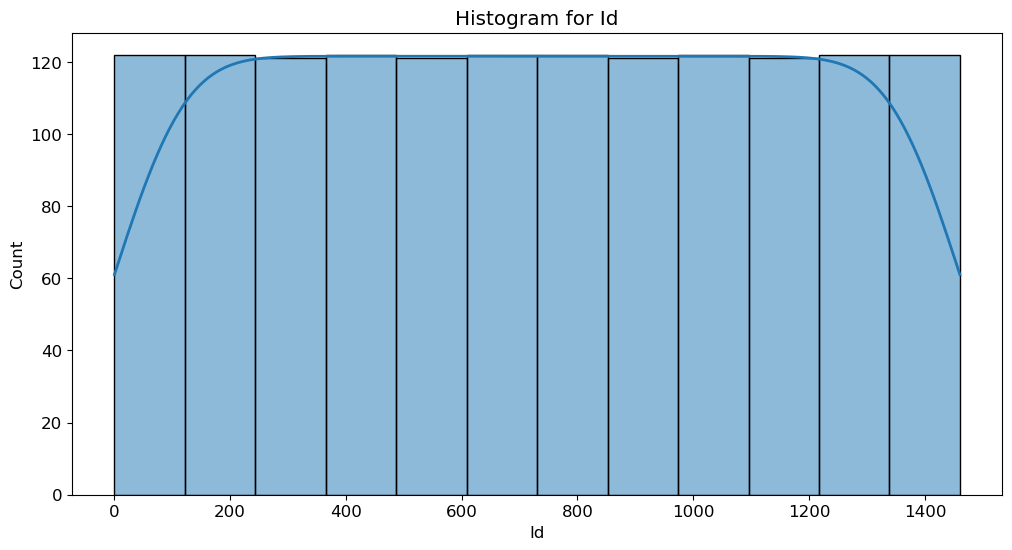

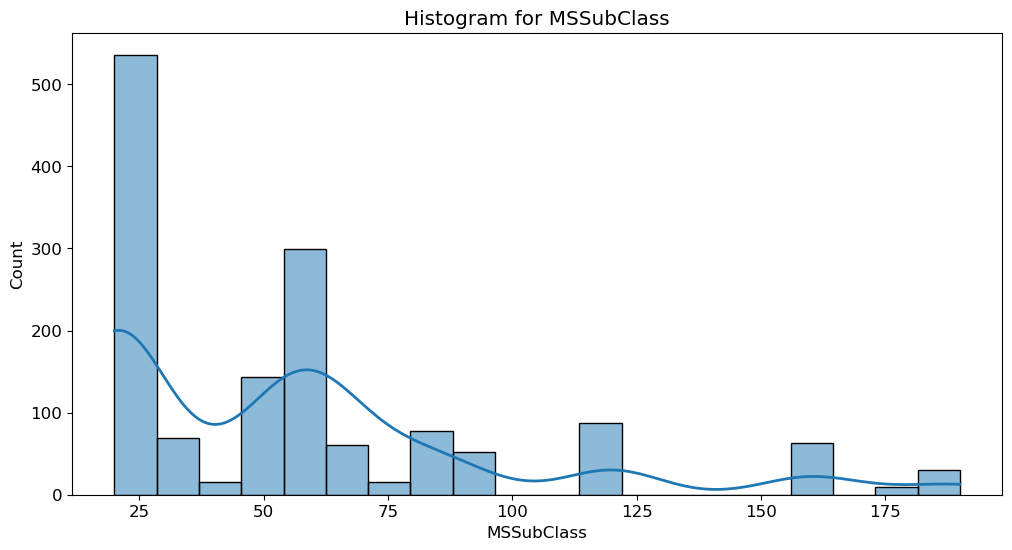

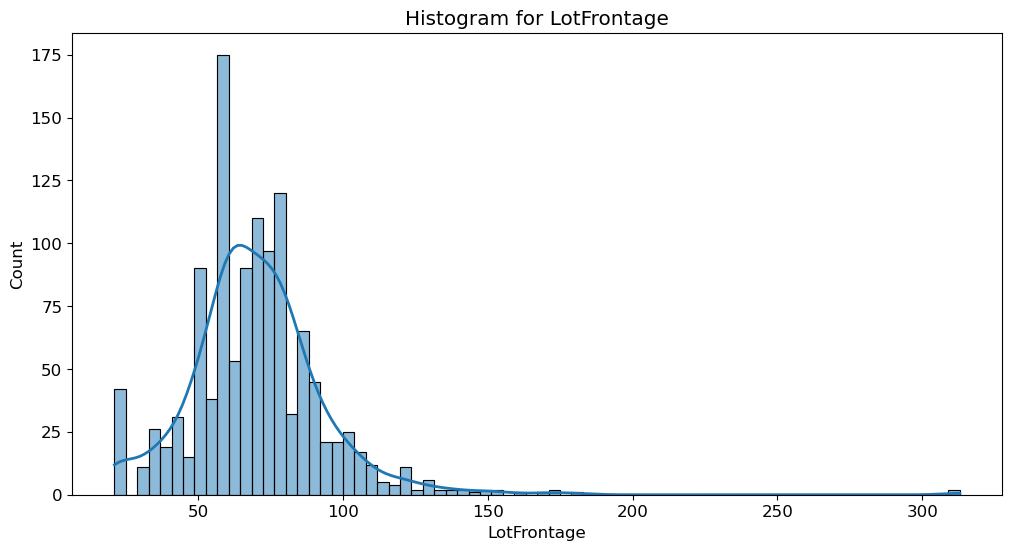

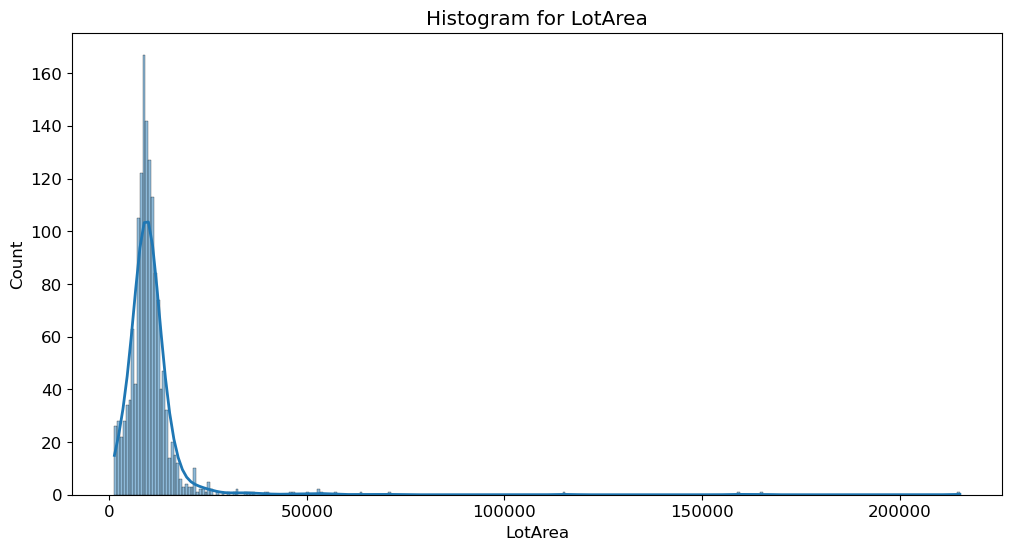

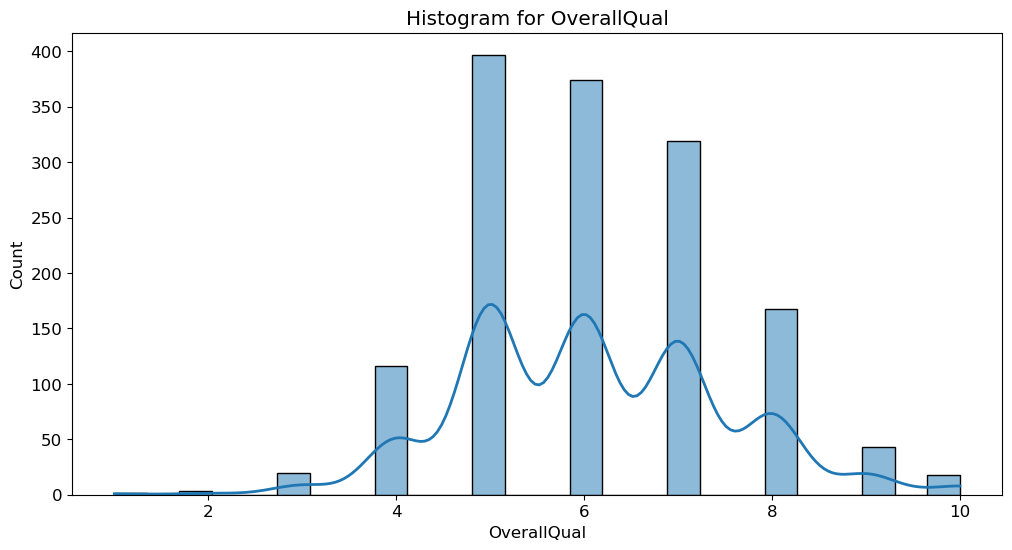

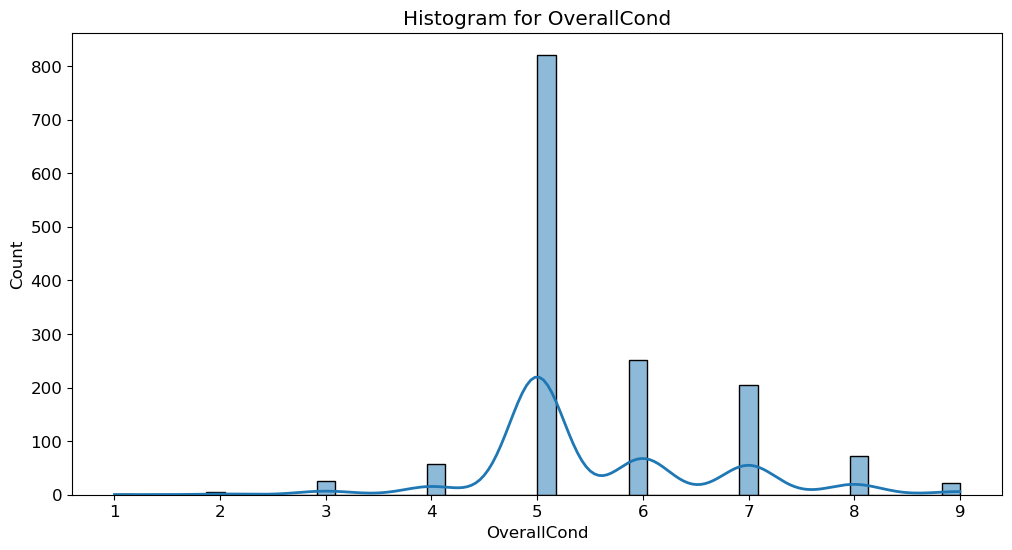

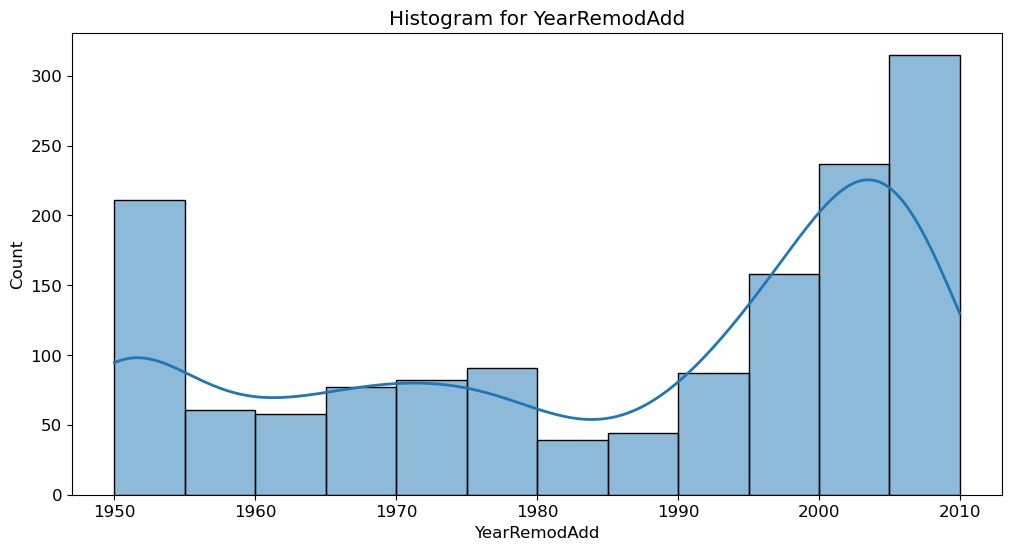

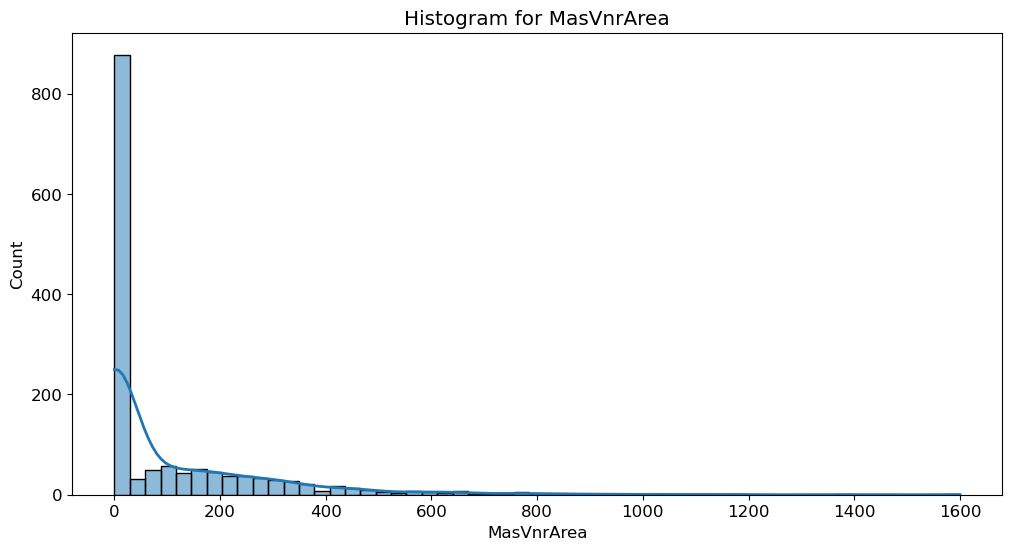

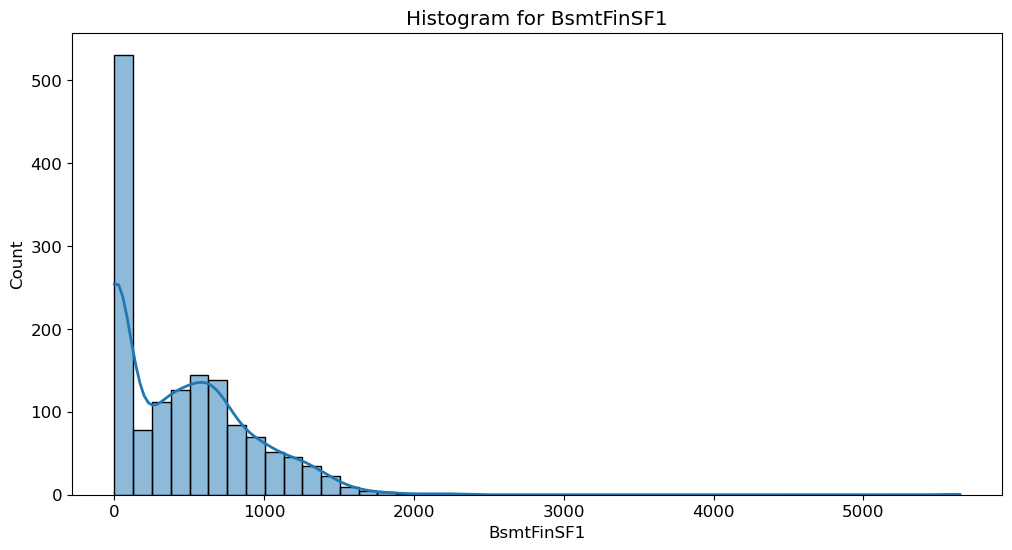

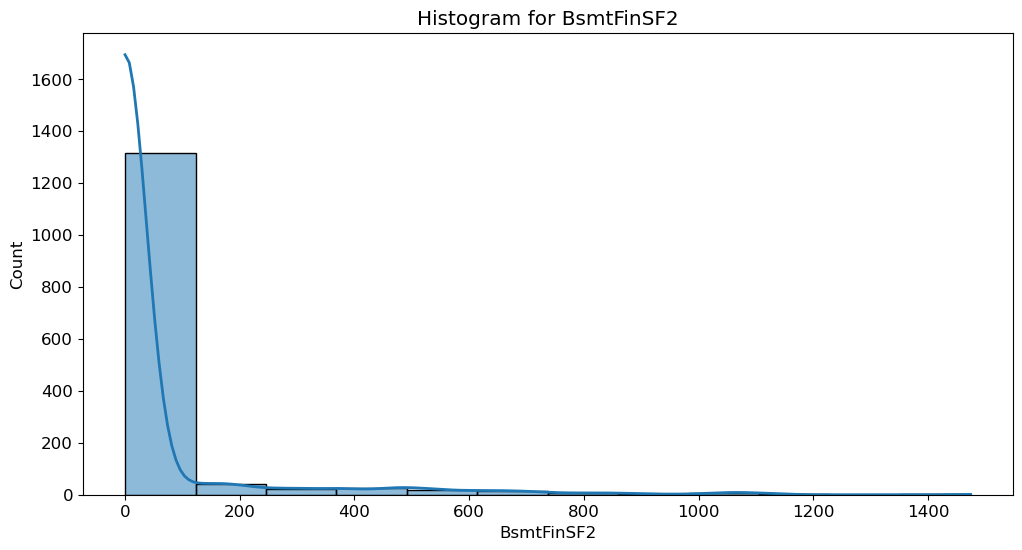

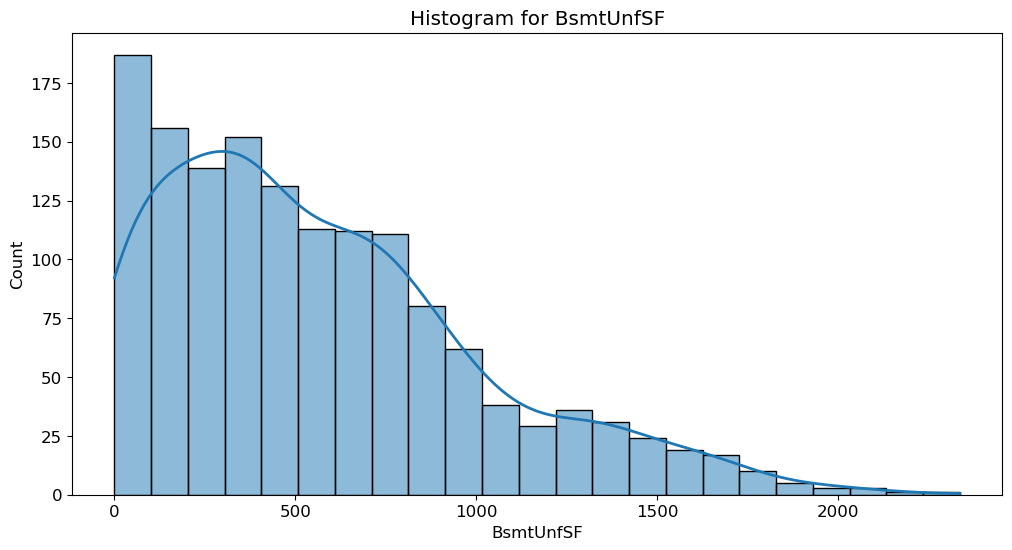

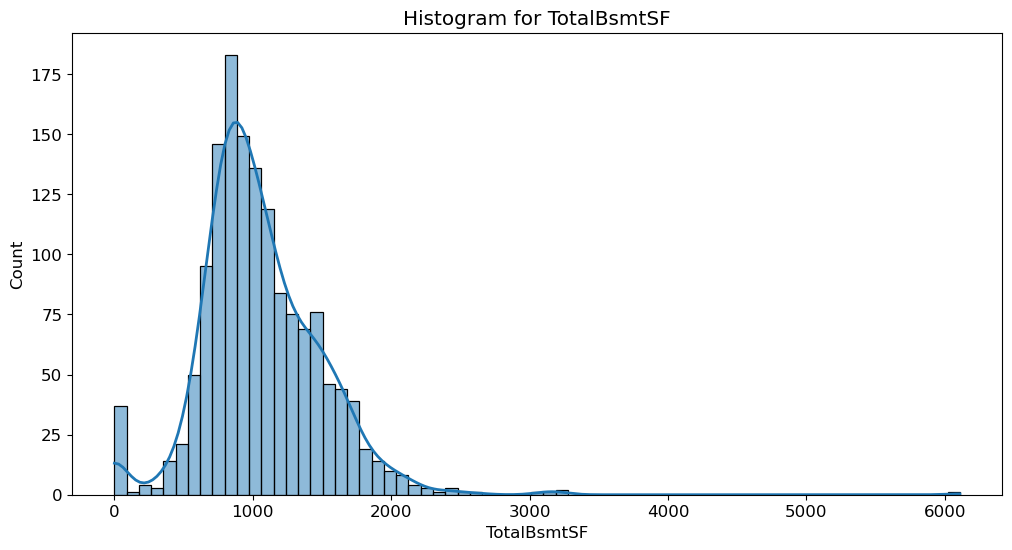

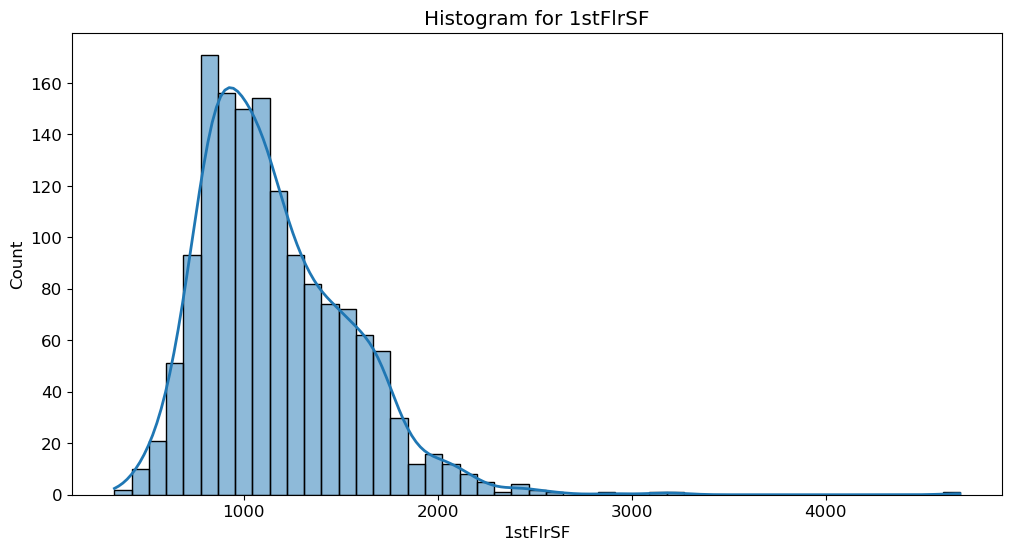

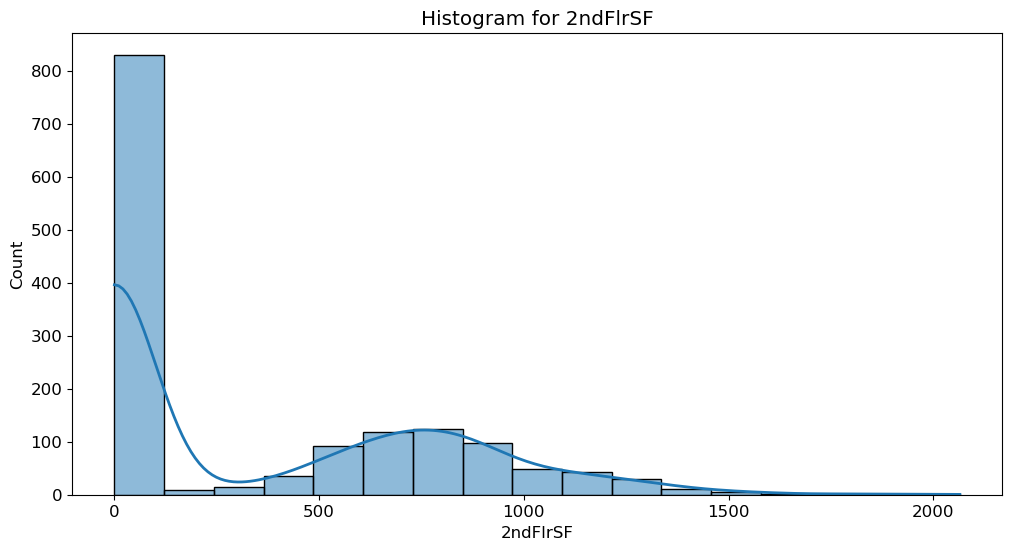

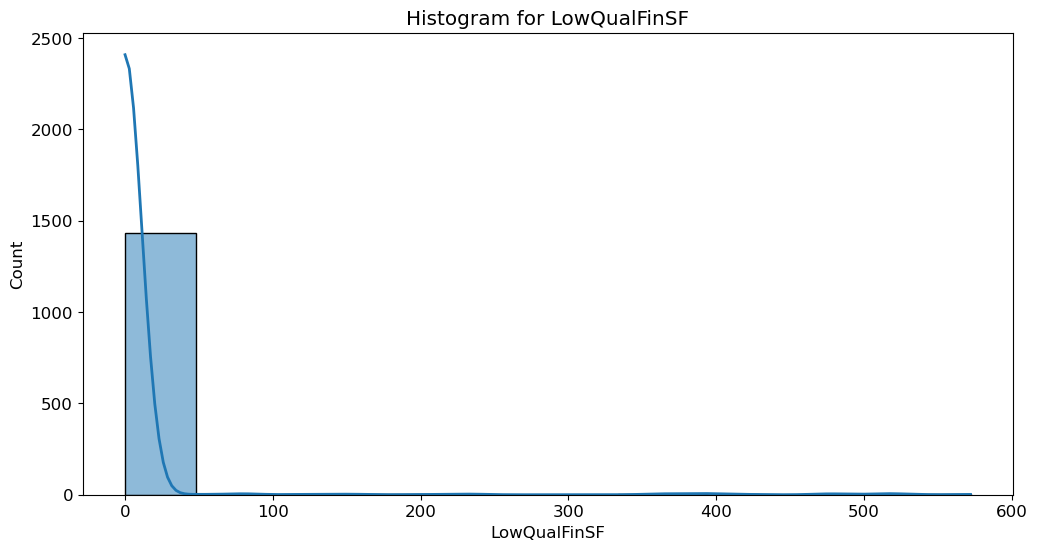

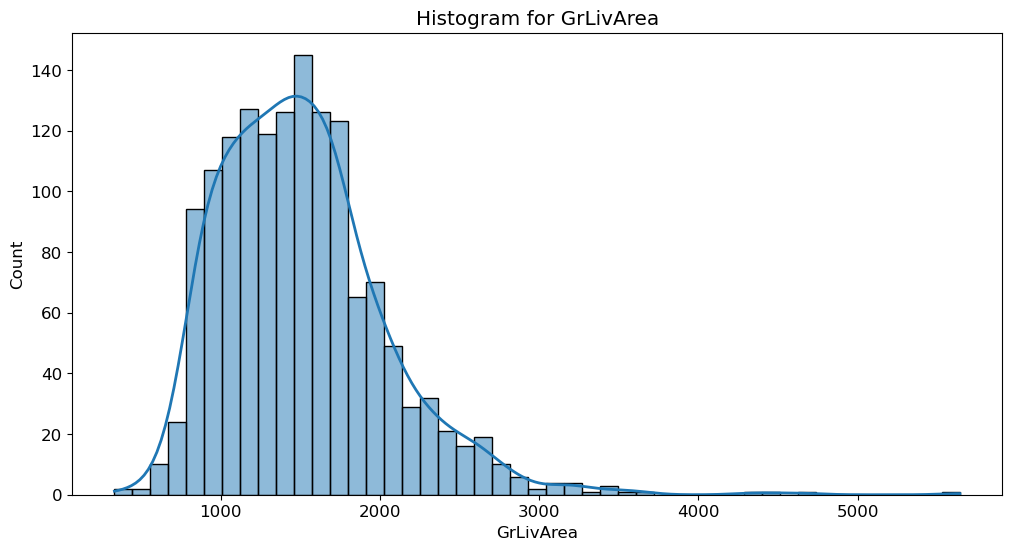

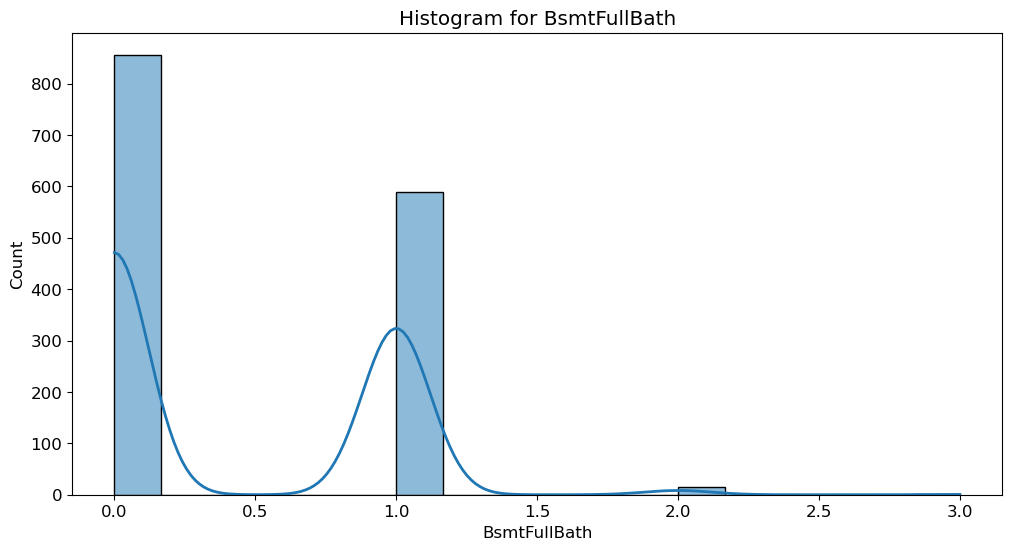

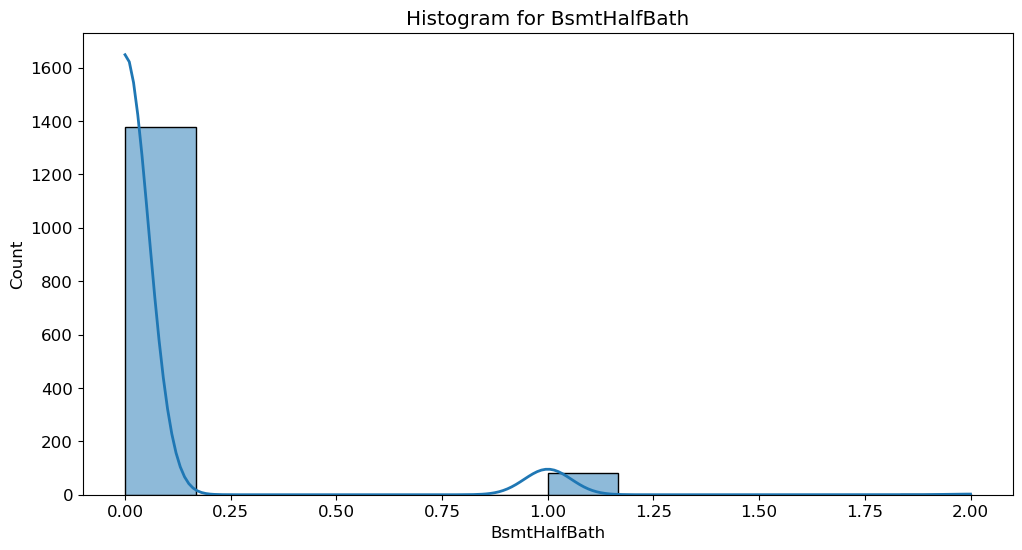

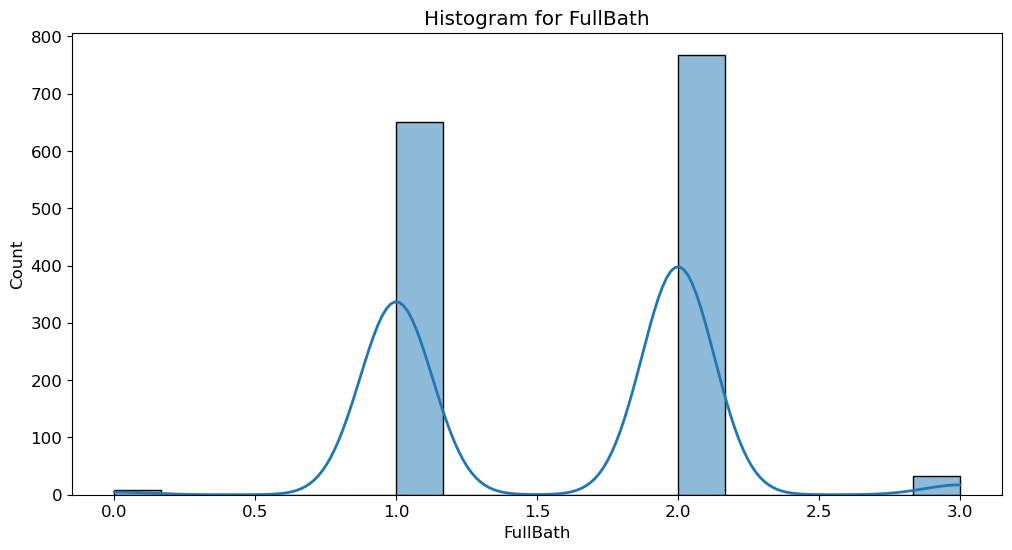

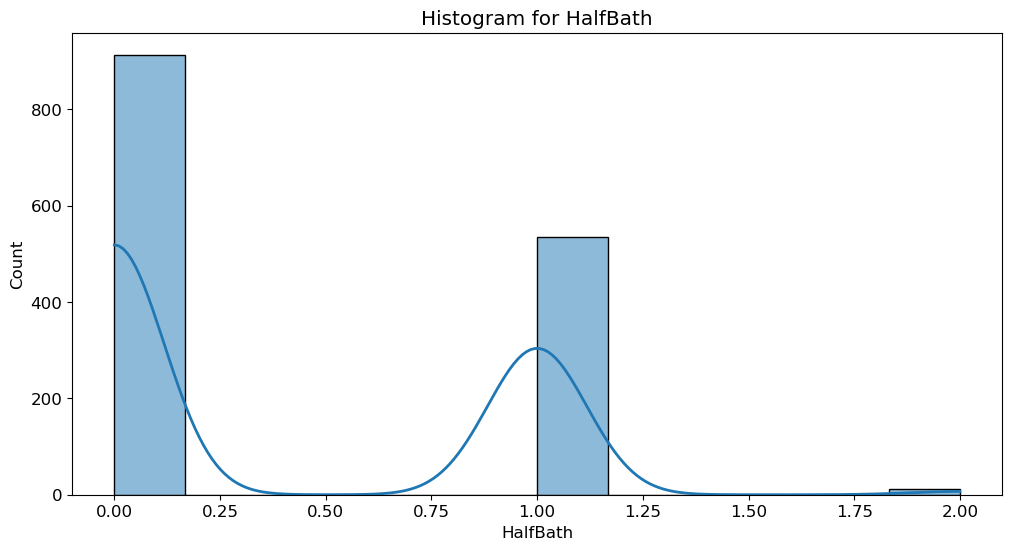

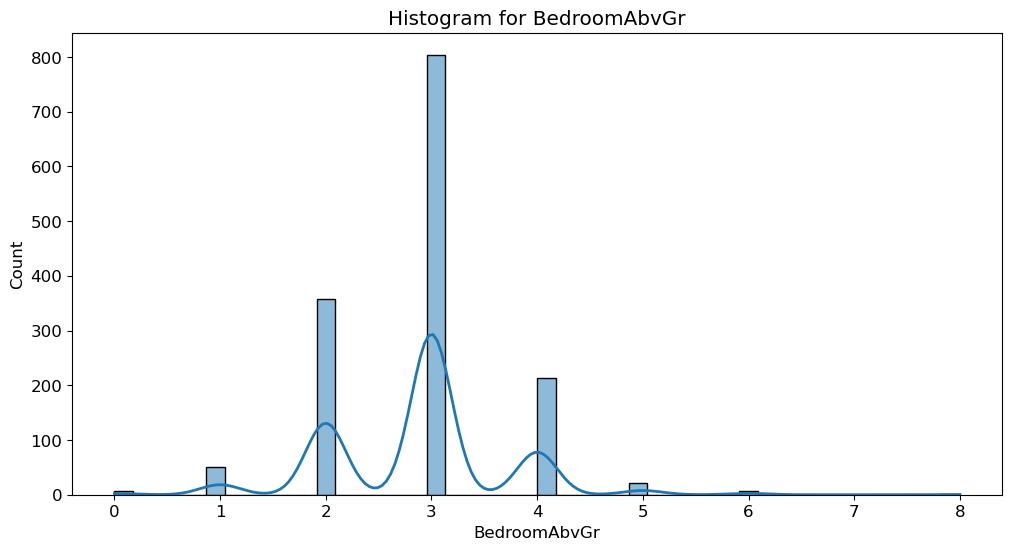

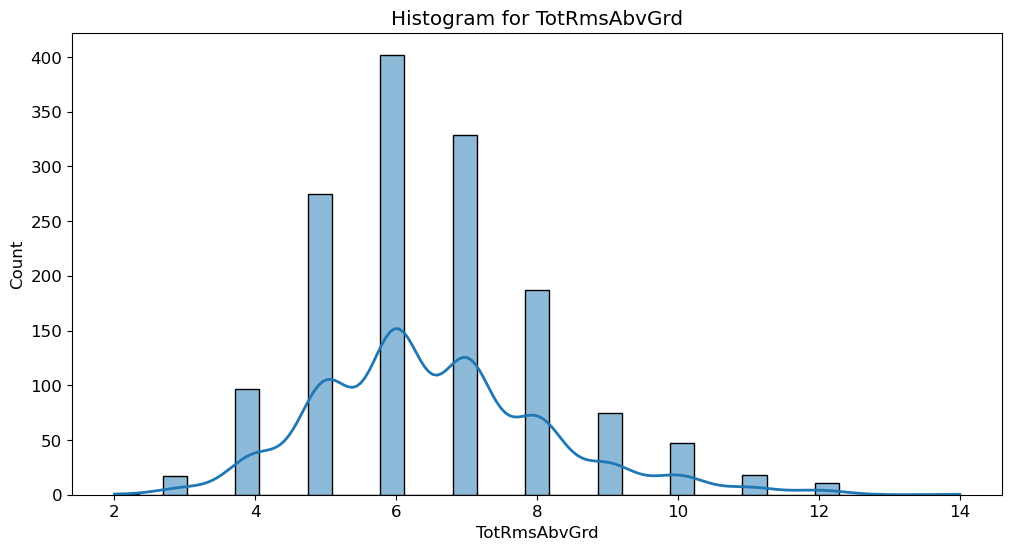

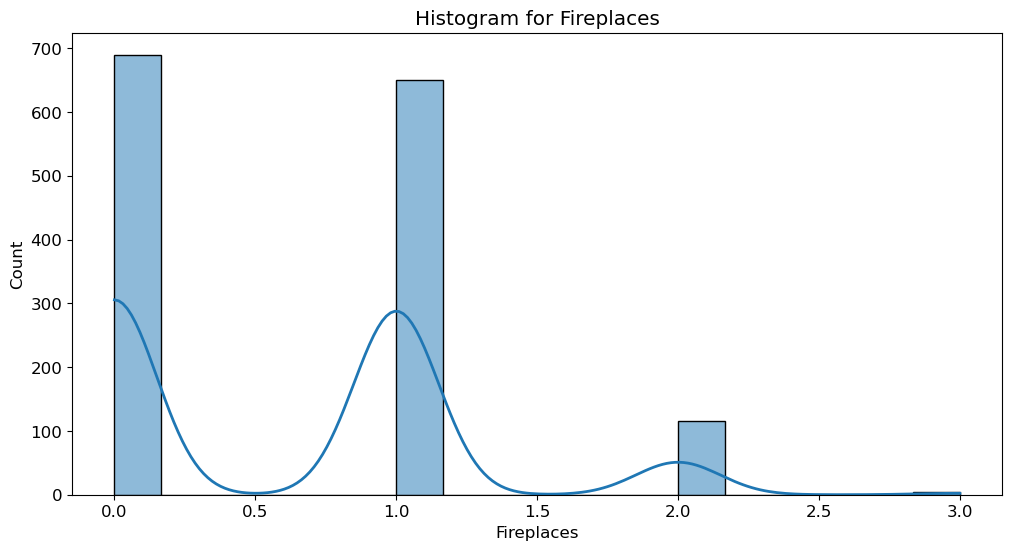

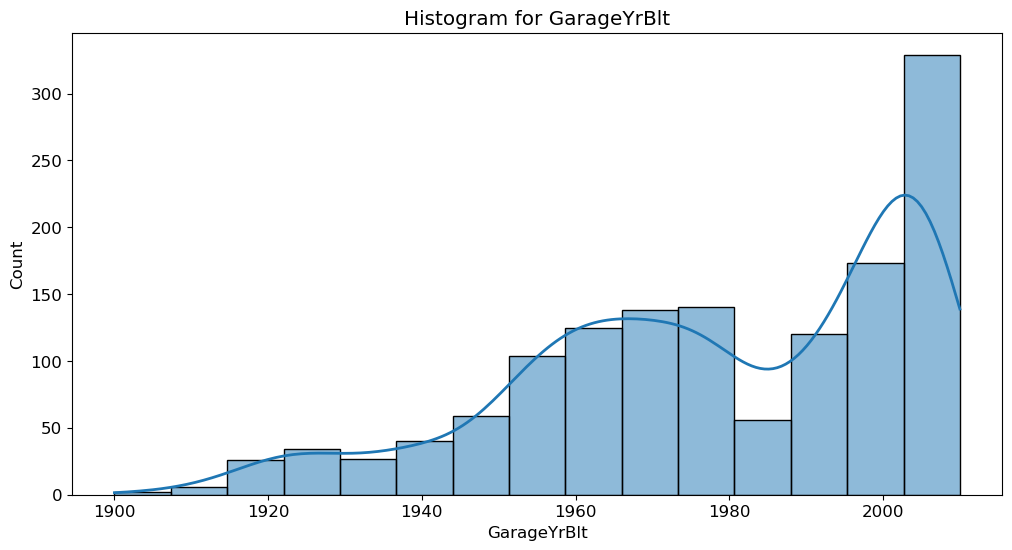

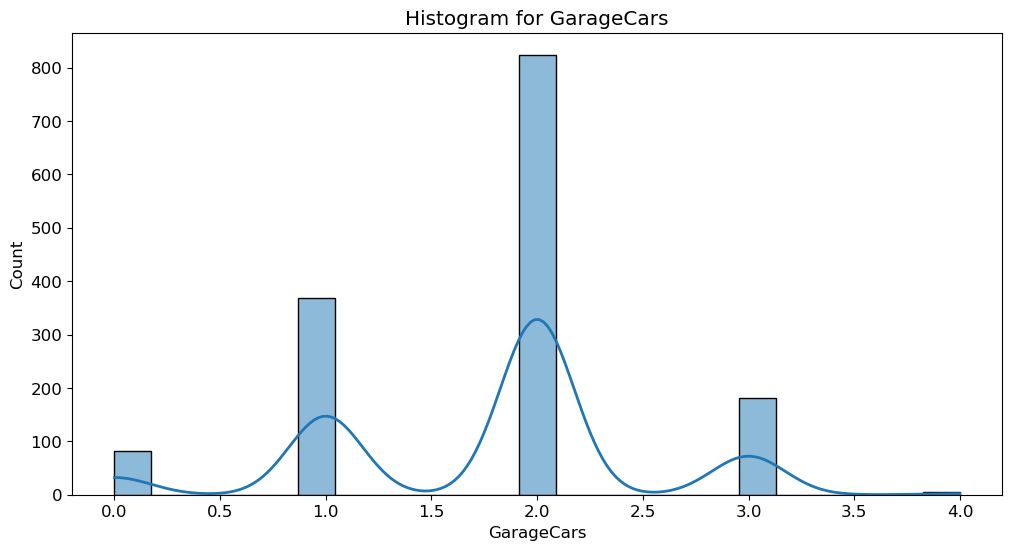

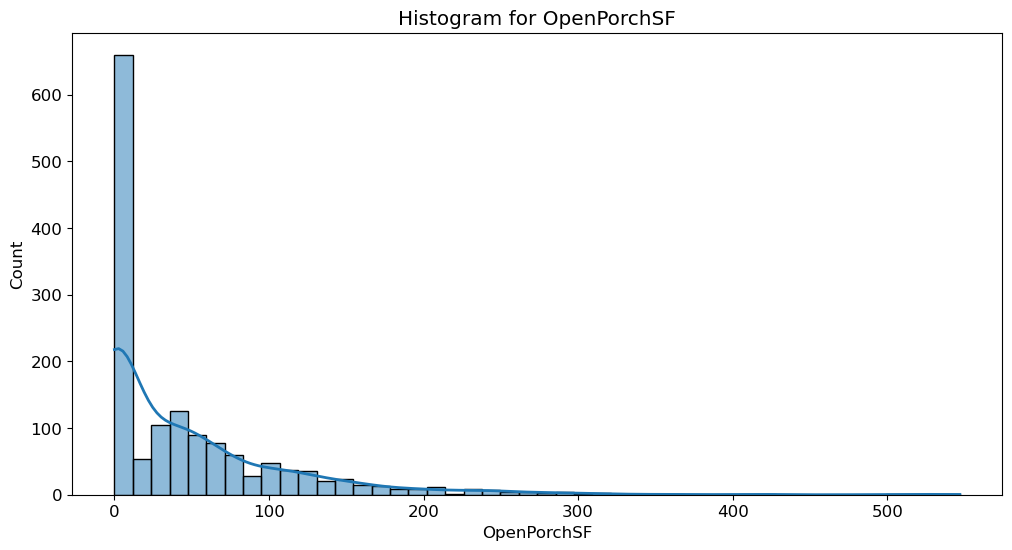

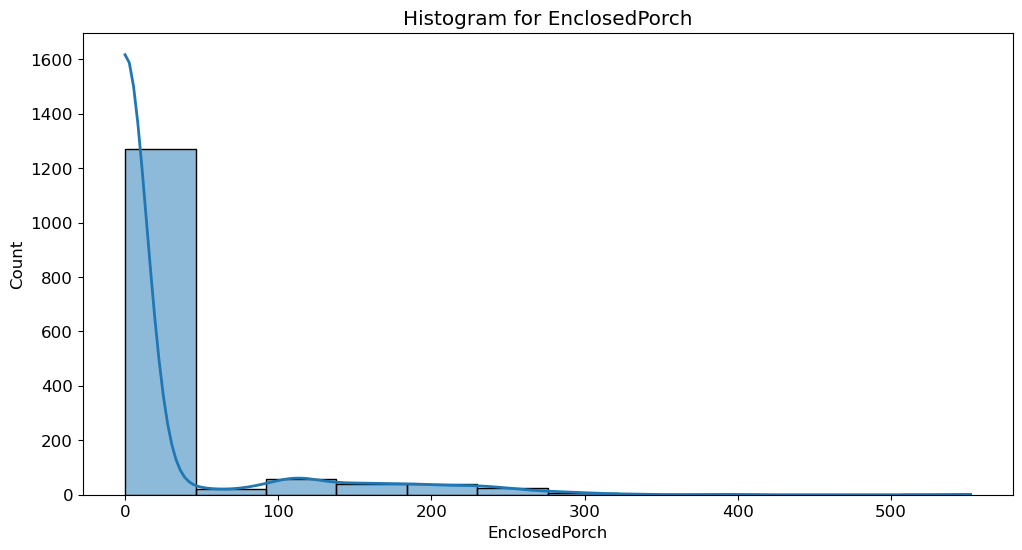

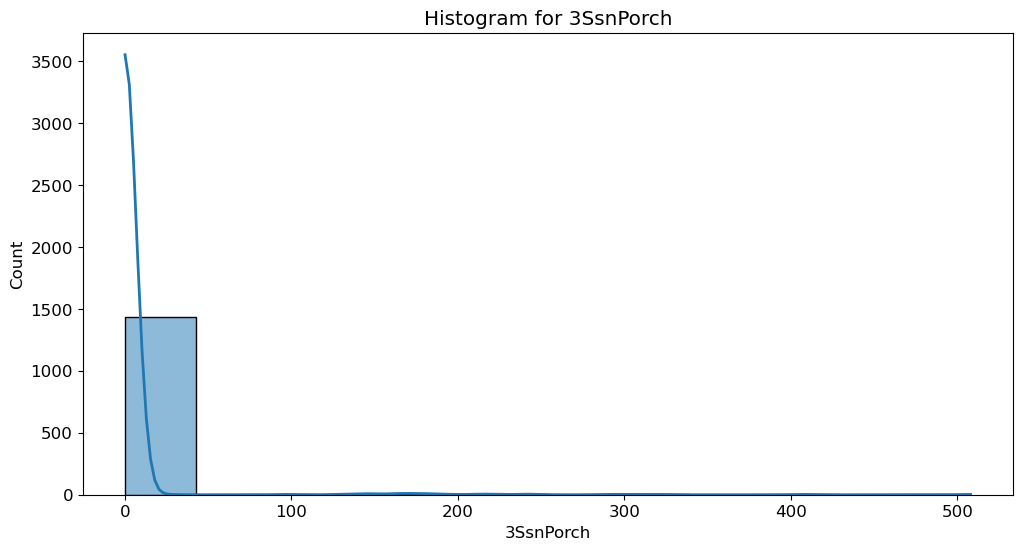

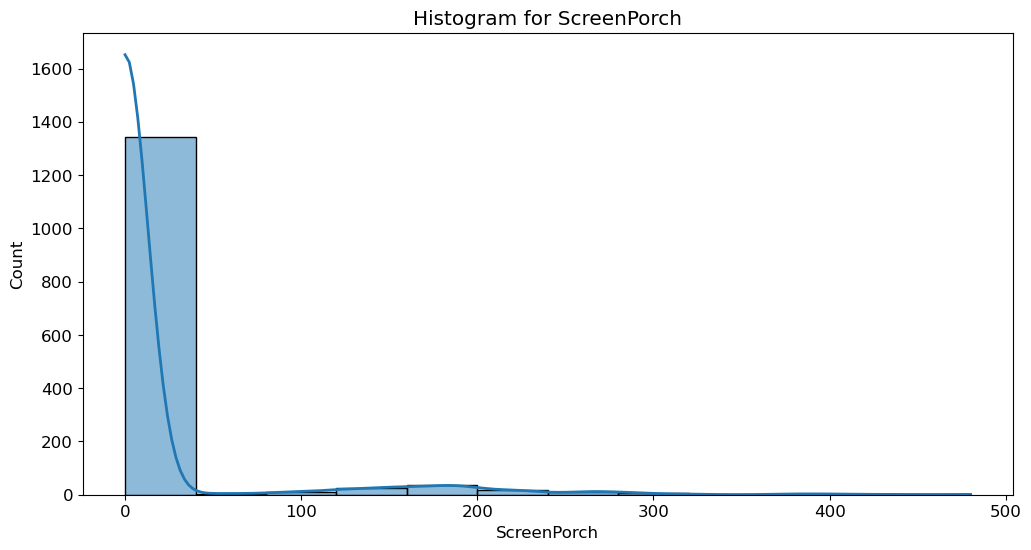

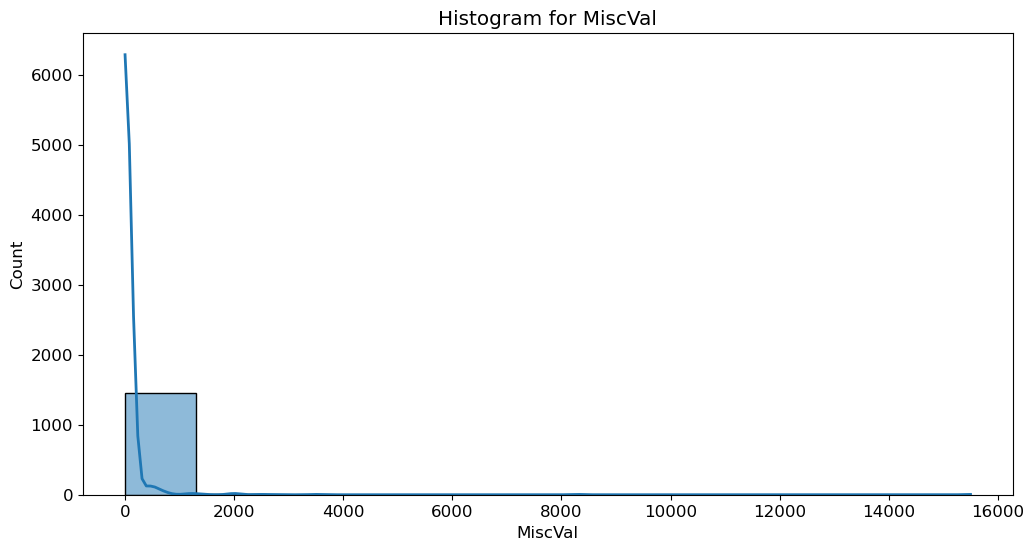

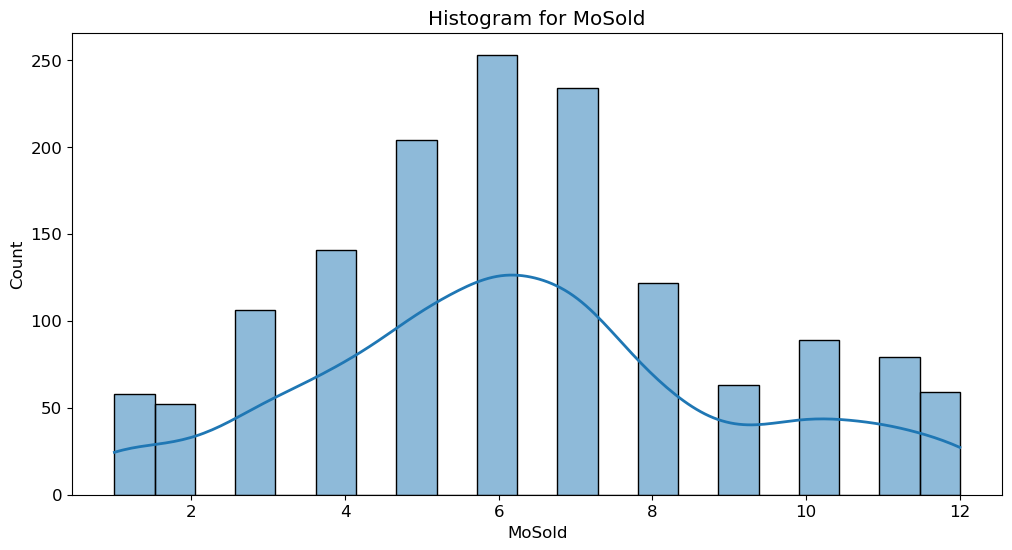

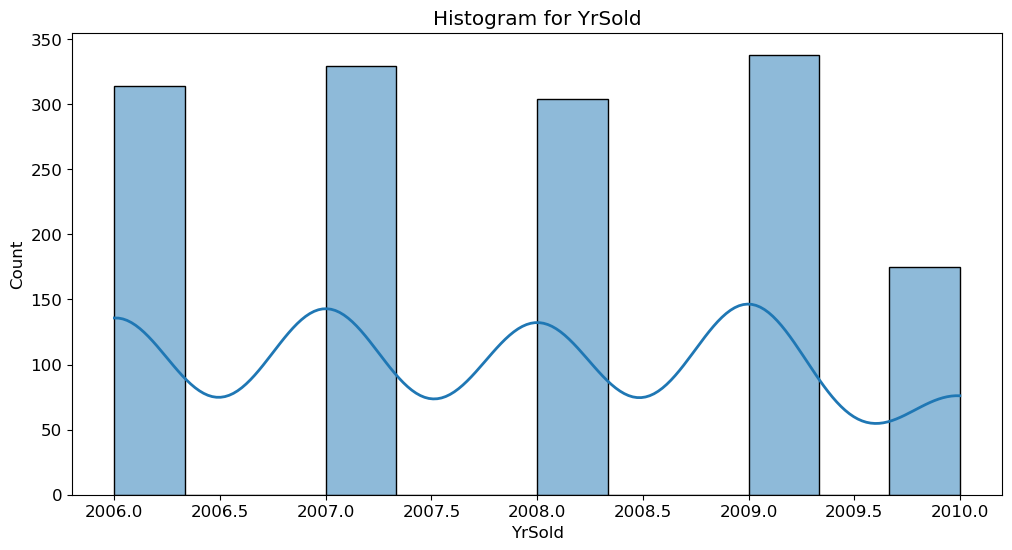

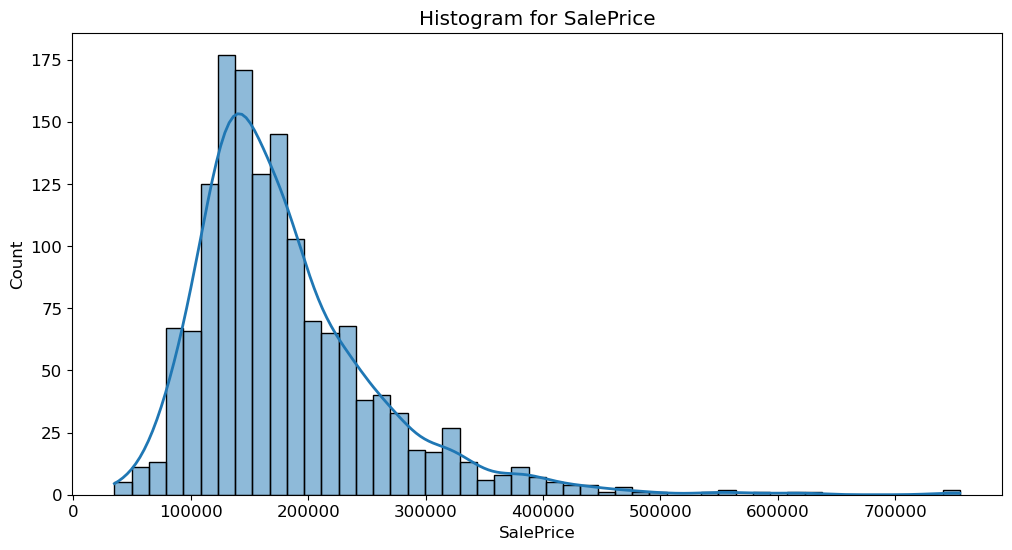

In [19]:
for j in con1:
    sns.histplot(data=df, x=j, kde=True)
    plt.title(f'Histogram for {j}')
    plt.show()

### Bivariate Analysis

In [20]:
con1

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

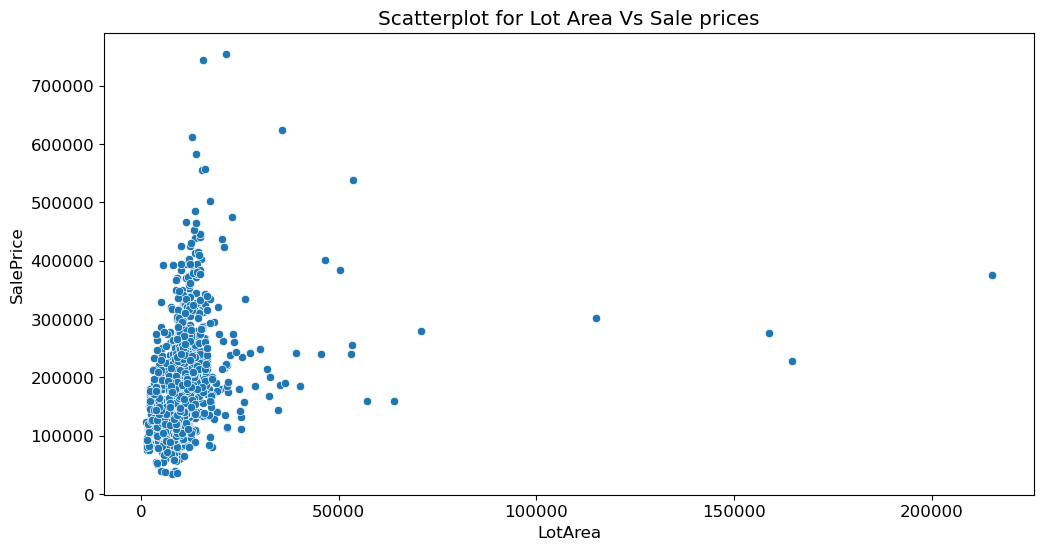

In [21]:
sns.scatterplot(data=df, x='LotArea', y='SalePrice')
plt.title('Scatterplot for Lot Area Vs Sale prices')
plt.show()

In [22]:
df[con1].corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [23]:
df[con1].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Heatmap

In [24]:
plt.figure(figsize=(30, 30))
sns.heatmap(data=df[con1].corr(), annot=True, fmt='.2f')

<Axes: >

Cat Vs Con Boxplot

In [25]:
cat1

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

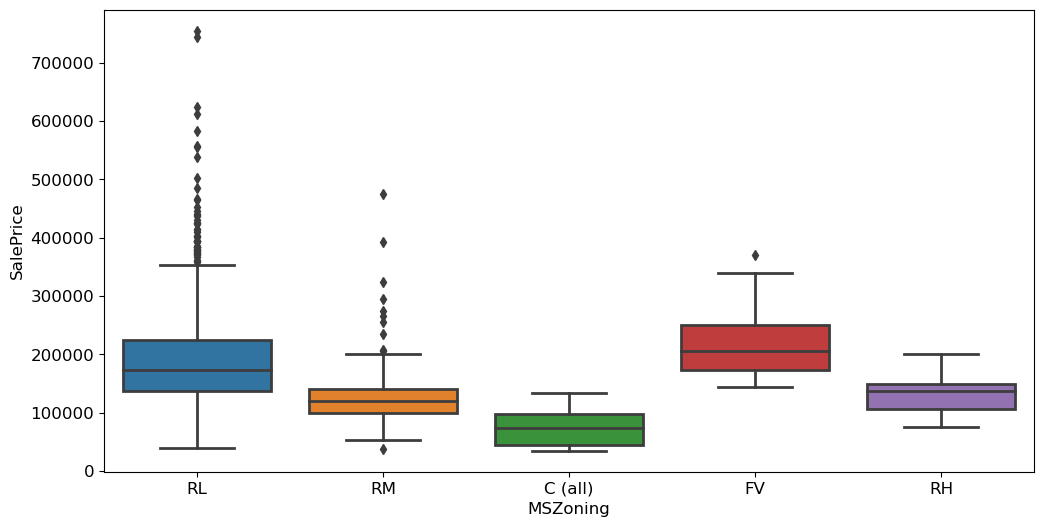

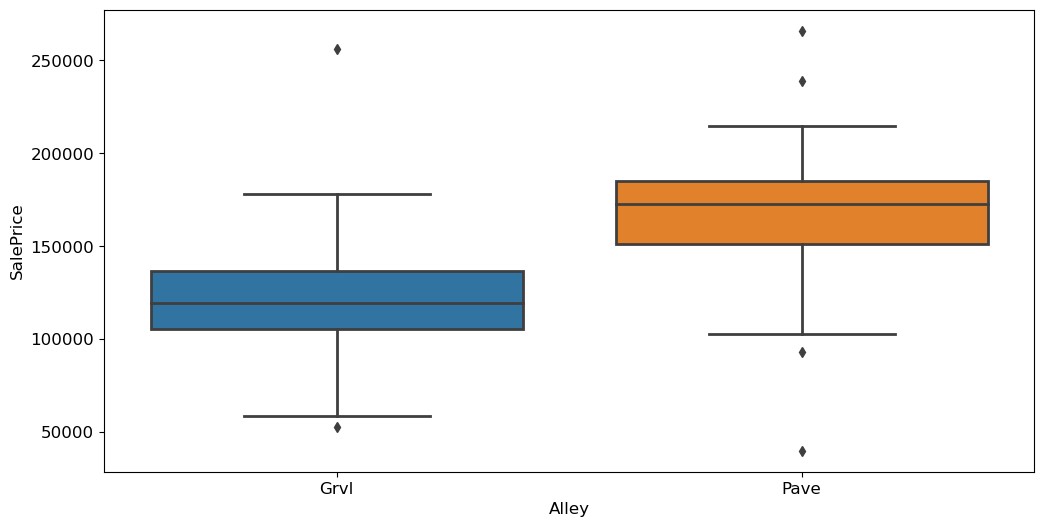

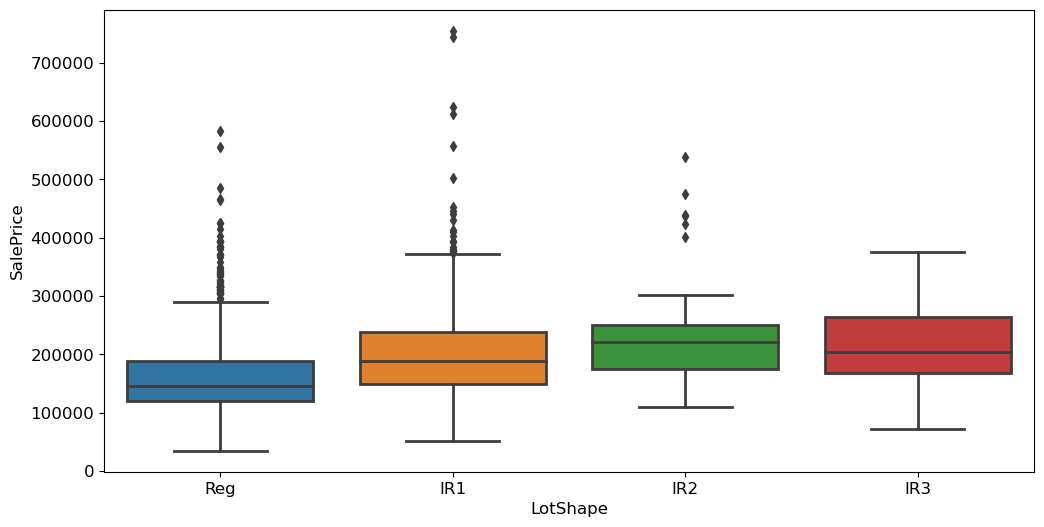

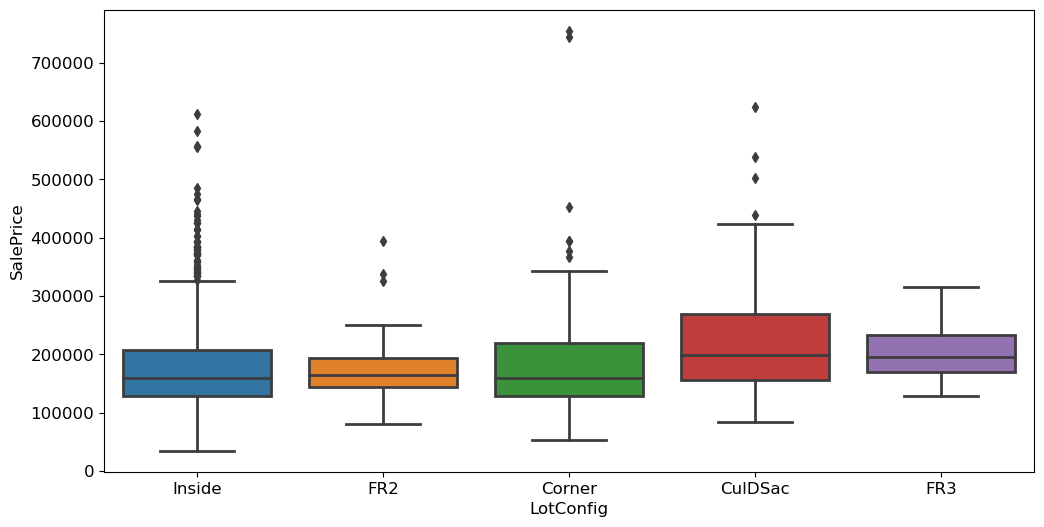

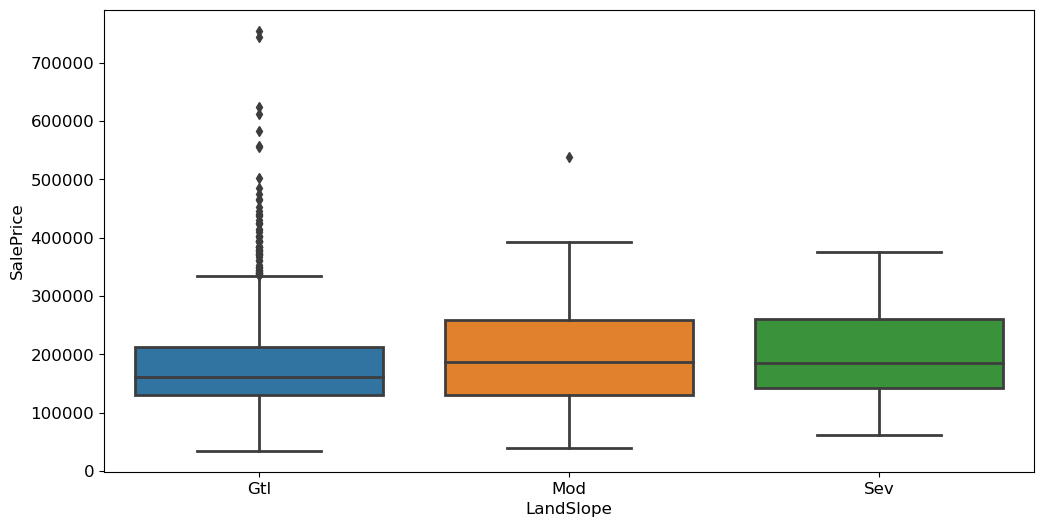

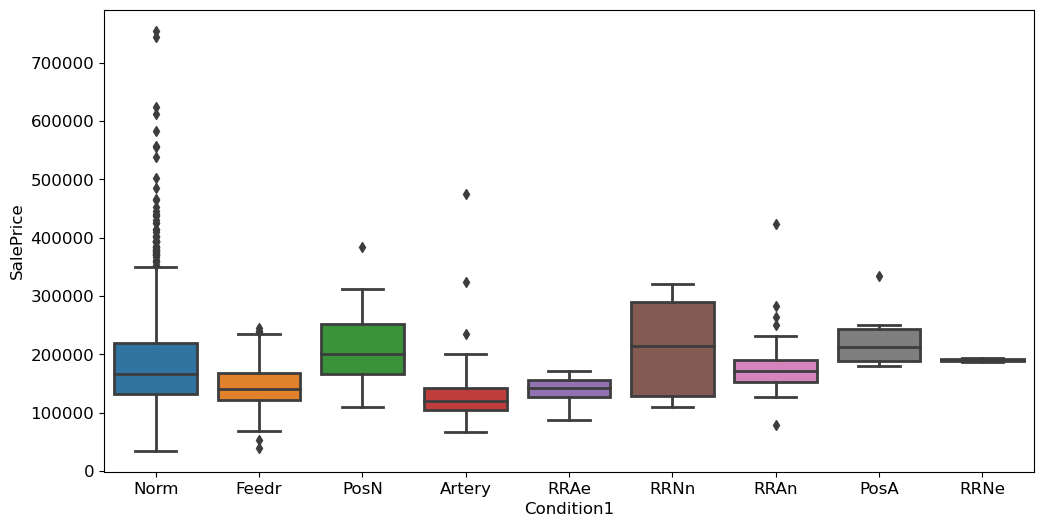

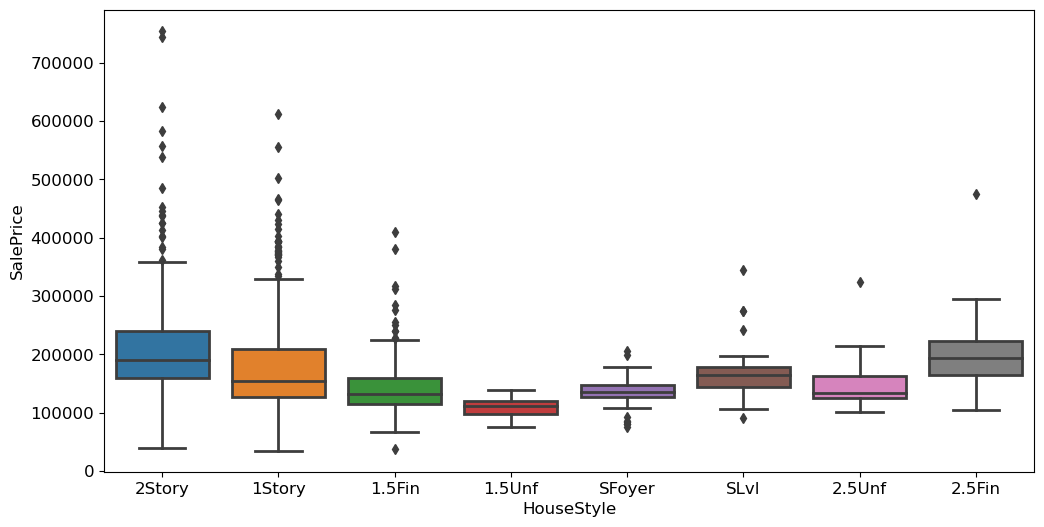

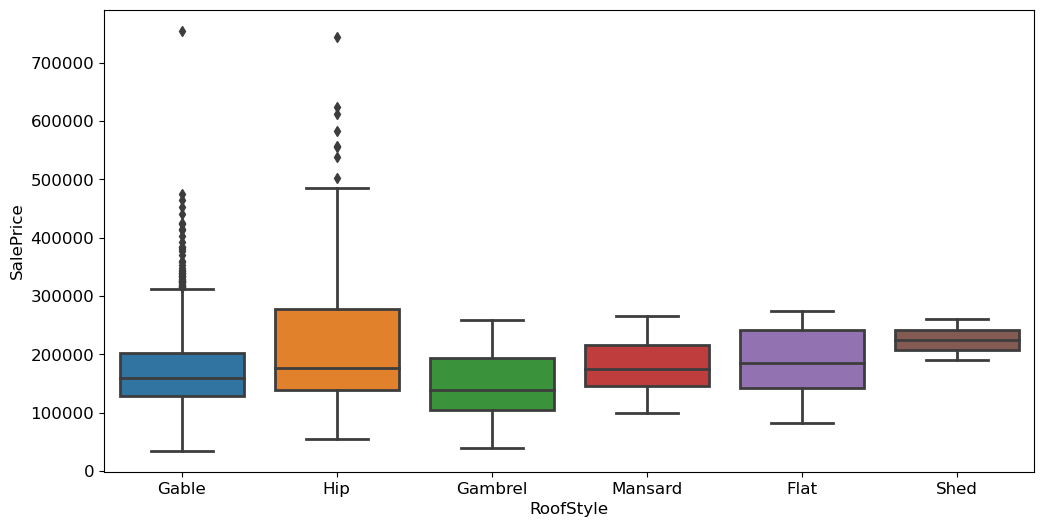

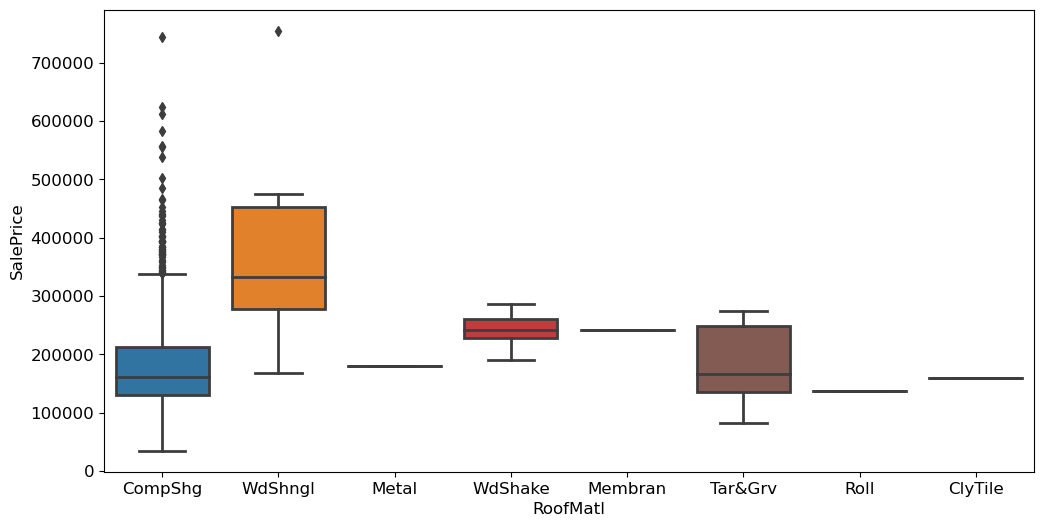

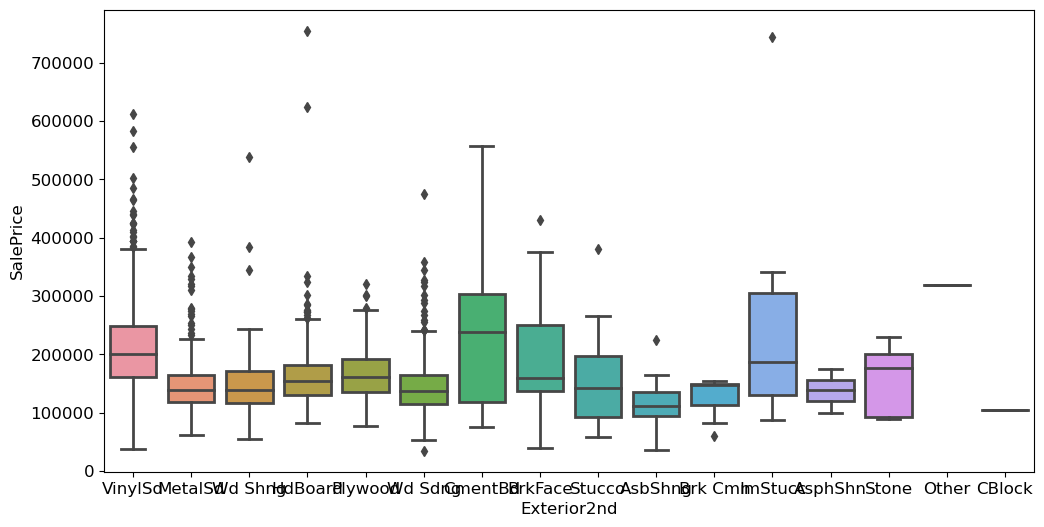

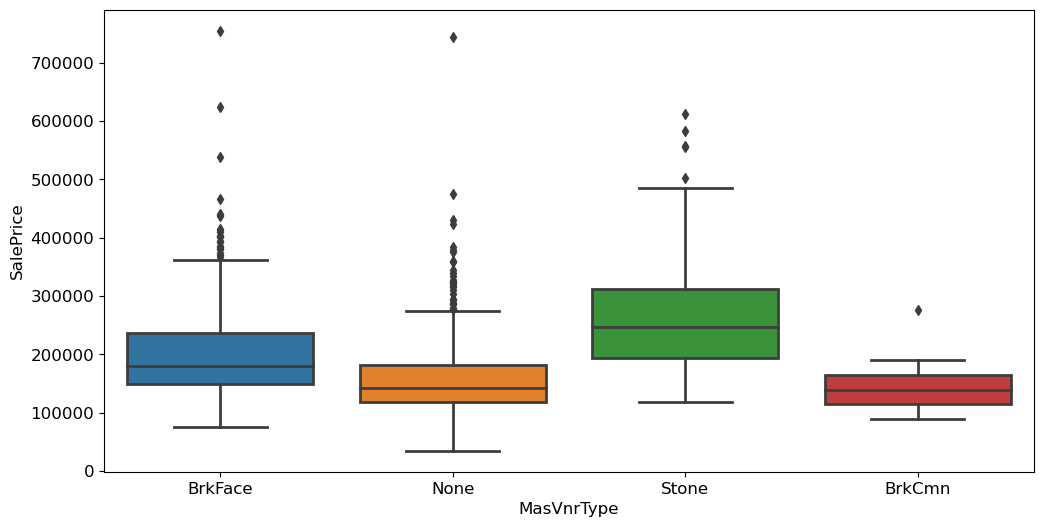

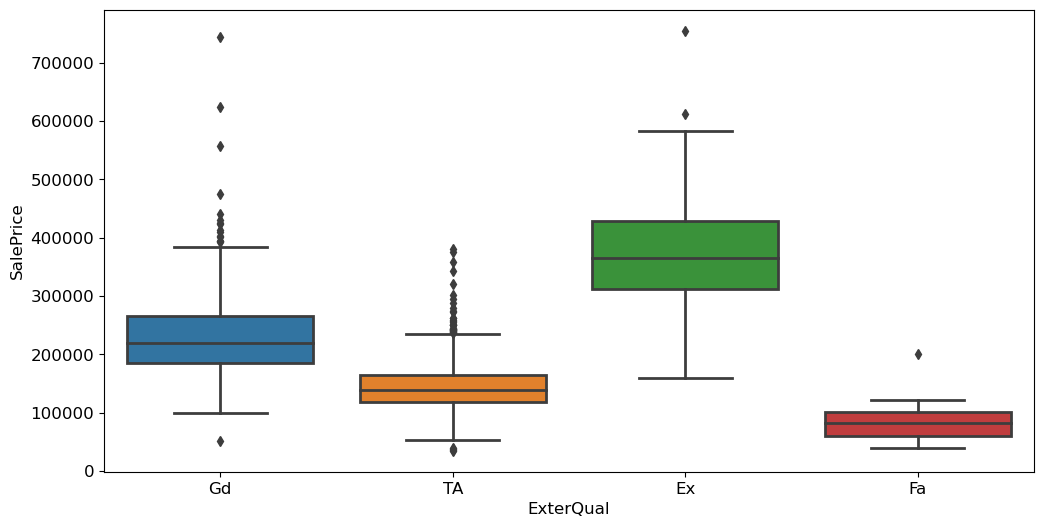

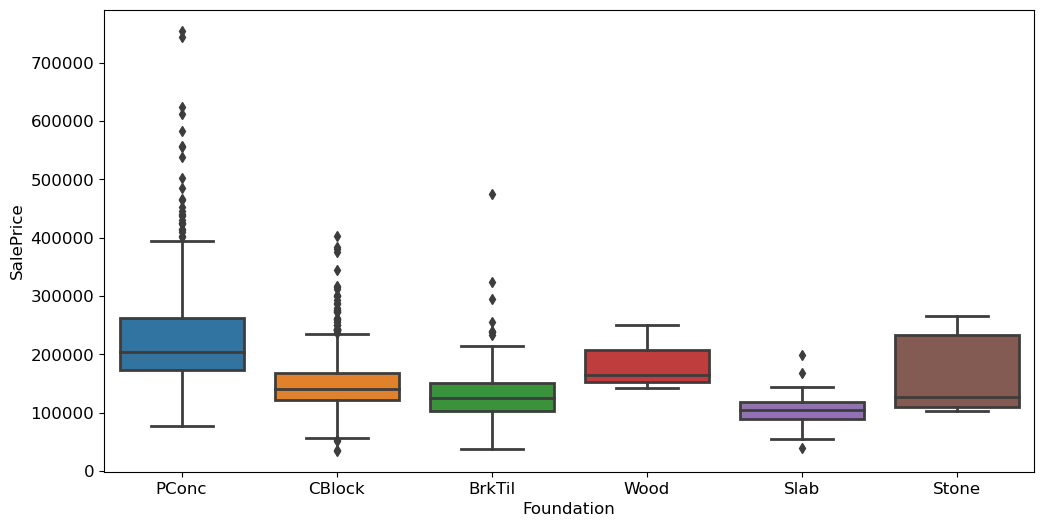

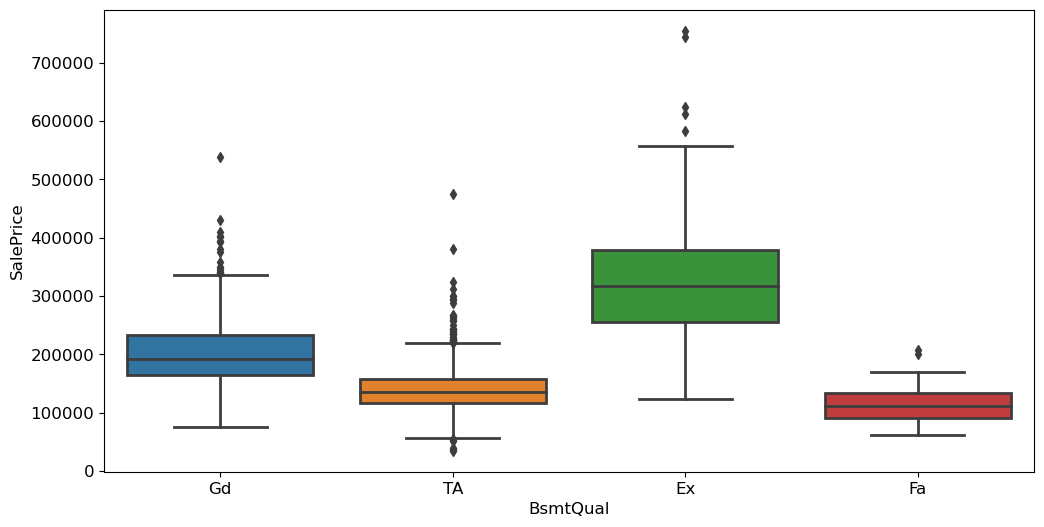

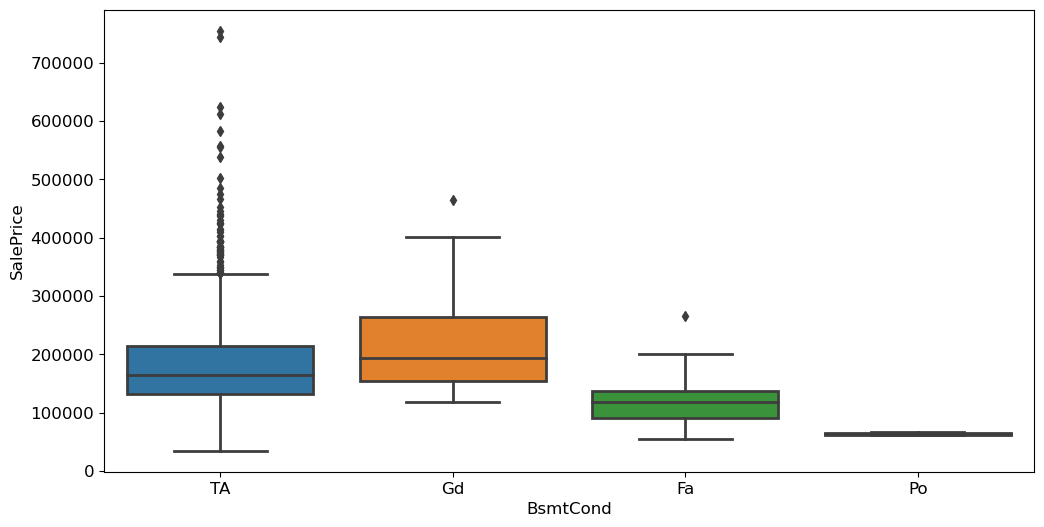

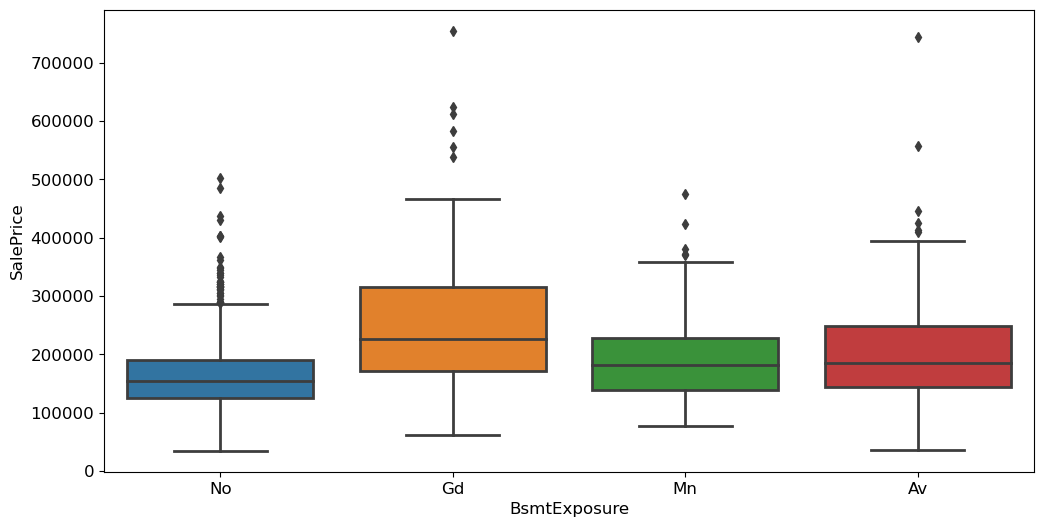

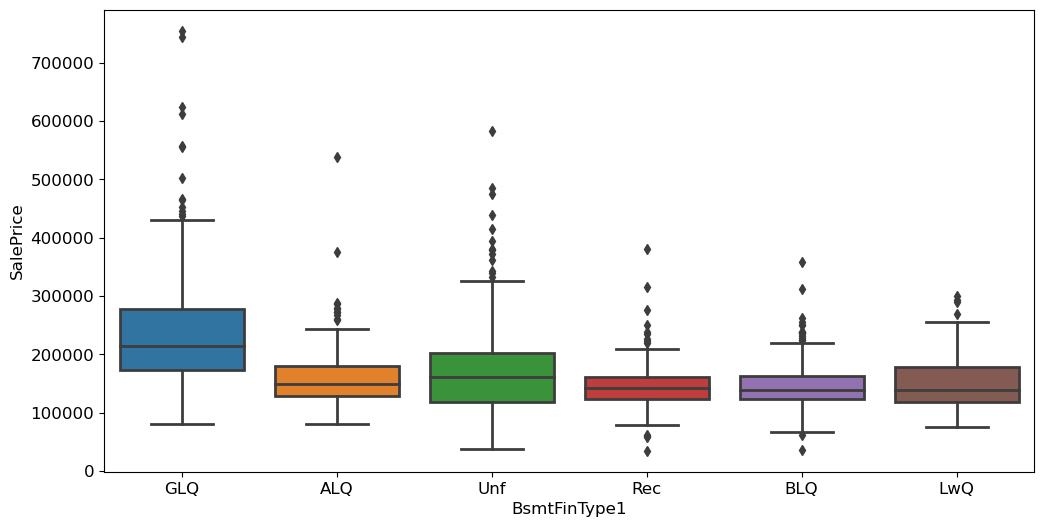

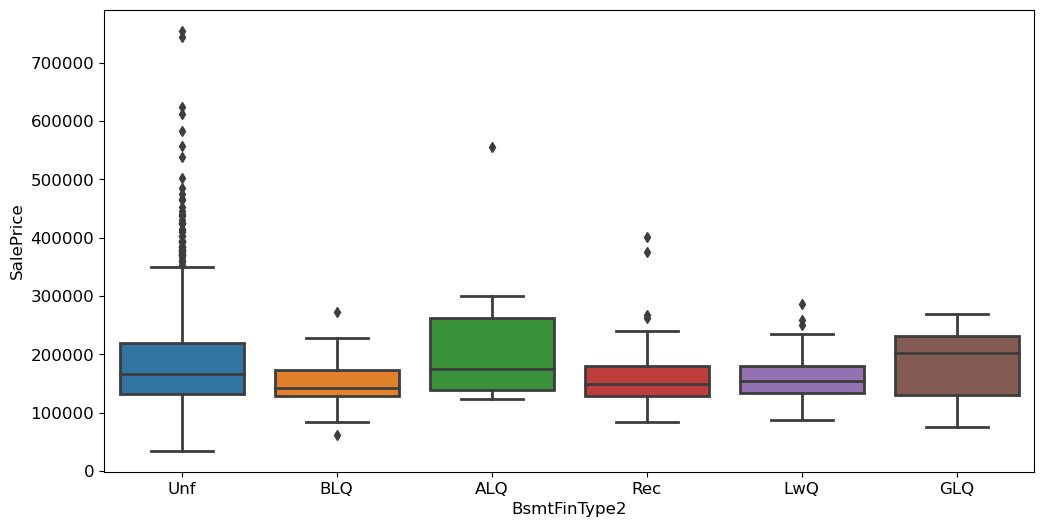

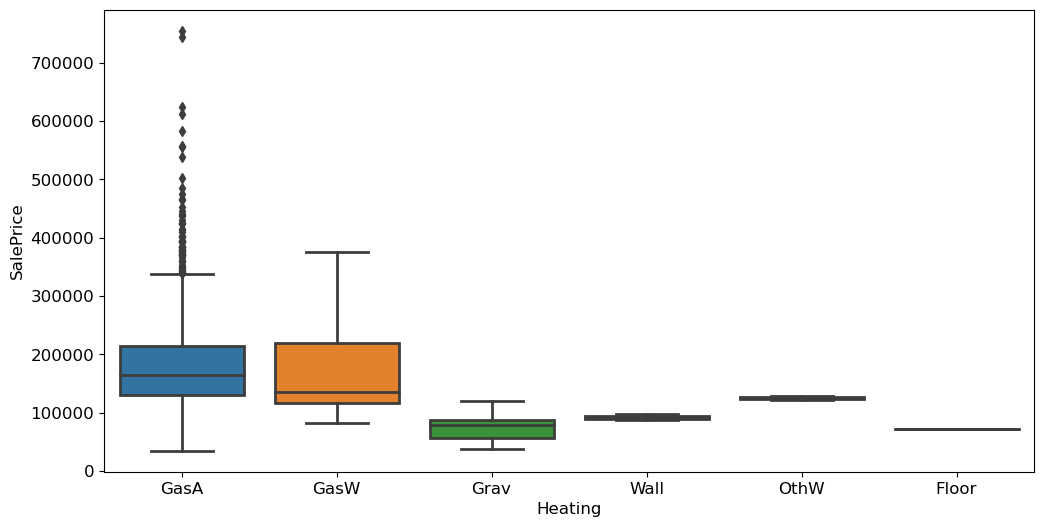

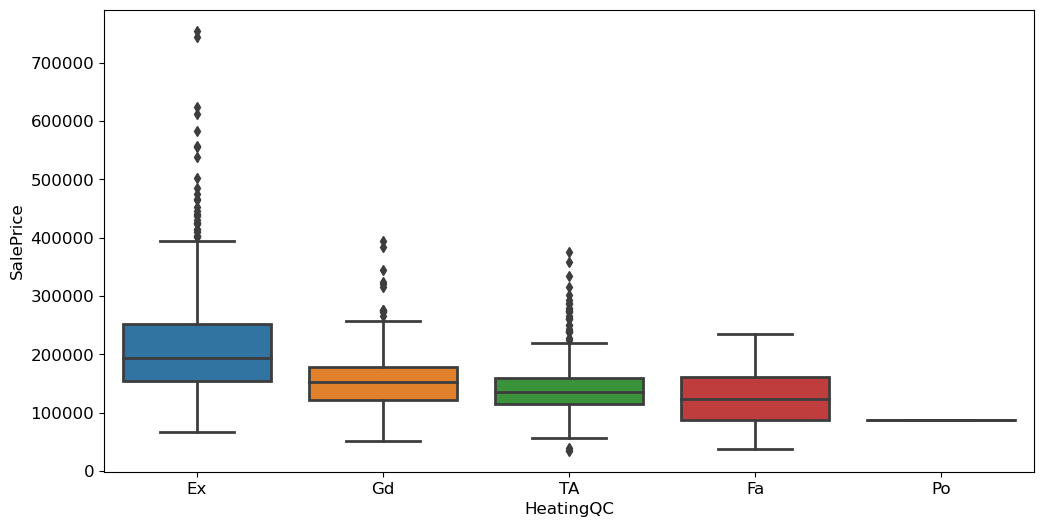

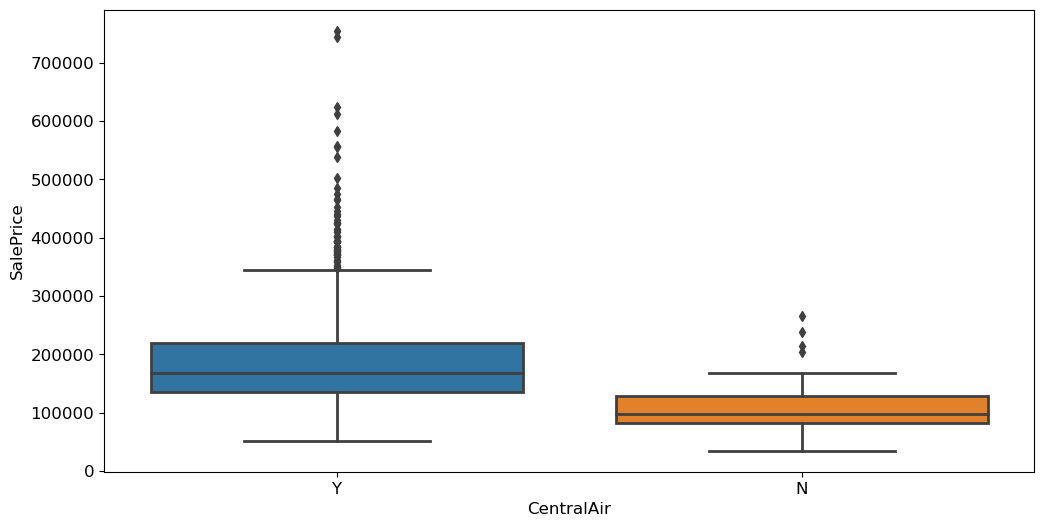

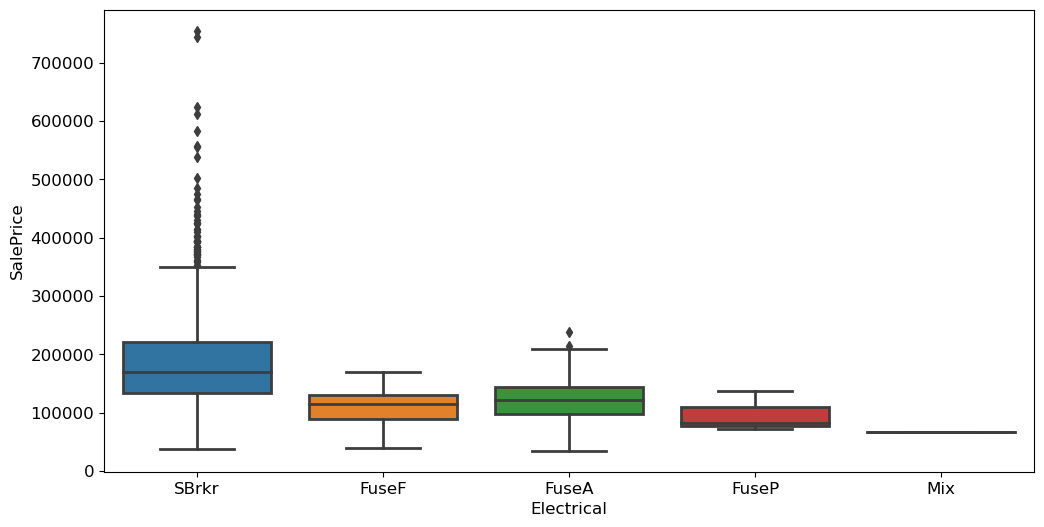

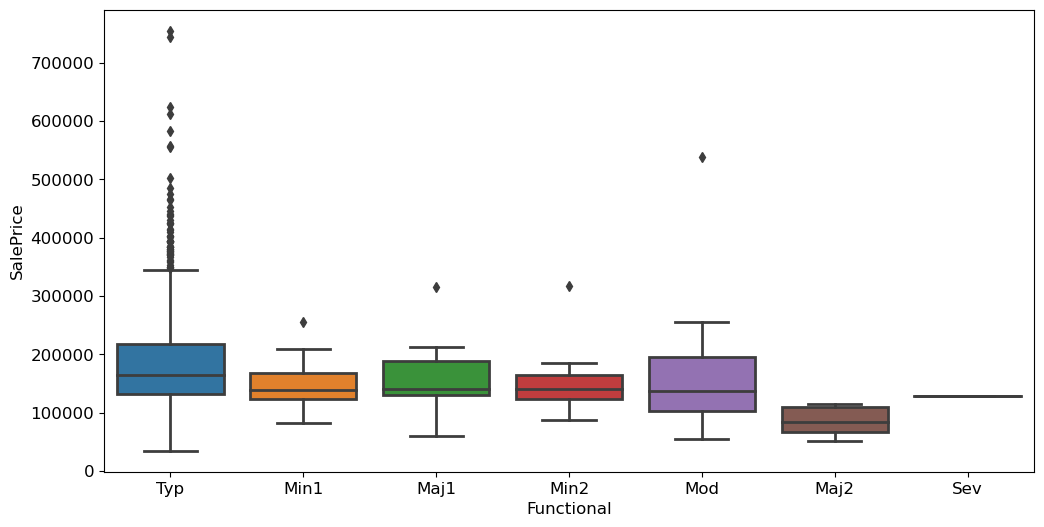

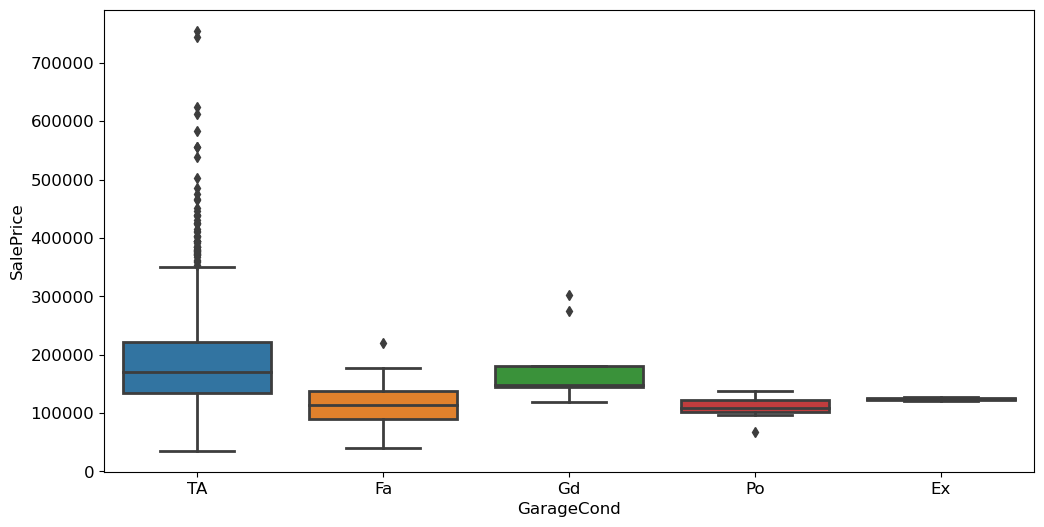

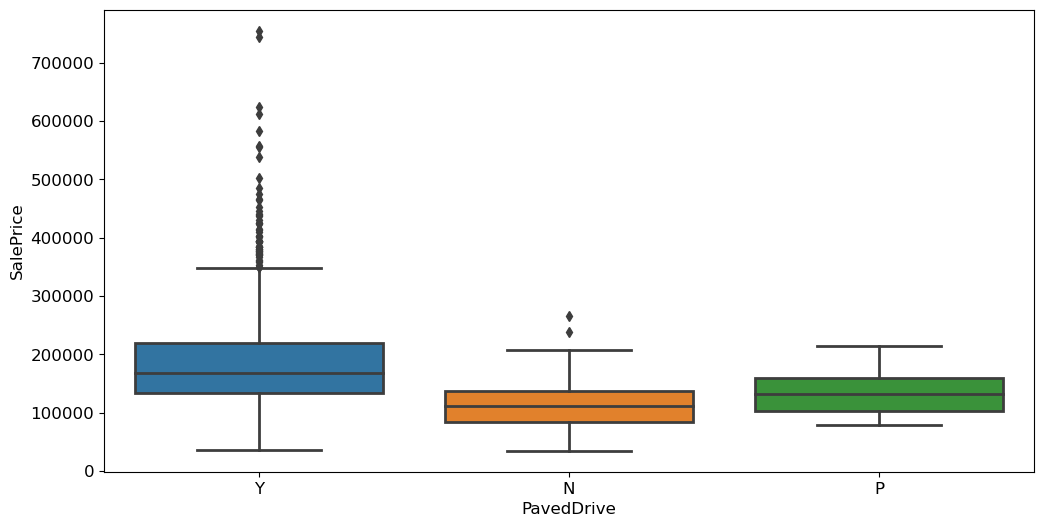

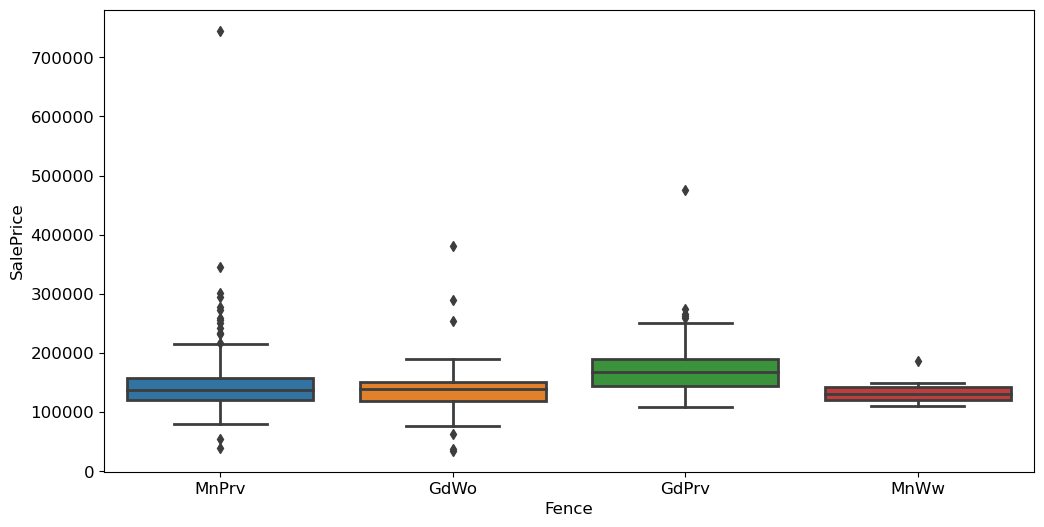

In [26]:
for i in cat1:
    sns.boxplot(data=df, x=i, y='SalePrice')
    plt.show()

Cat Vs Cat Crosstab Heatmap

In [27]:
cat1

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
ctab = pd.crosstab(df['ExterQual'], df['ExterCond'])
ctab

ExterCond  Ex  Fa   Gd  Po   TA
ExterQual                      
Ex          1   0    3   0   48
Fa          0   6    0   0    8
Gd          0   0   35   0  453
TA          2  22  108   1  773

In [29]:
sns.heatmap(ctab, annot=True, fmt='d')

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

###  Decide Strategy for Con, Cat features , Cat most_frequent, constant

In [30]:
X = df.drop(columns=['Id', 'SalePrice'])
Y = df[['SalePrice']]

In [31]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [32]:
Y.head()

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

In [33]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [34]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Sklearn Pipeline  1. Feature selection (Ordinal Encode) 2. Final Pipeline(OneHotEncoder)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [37]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [38]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvail')),
                            ('Ordinal', OrdinalEncoder())])

In [39]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [40]:
X_pre = pre1.fit_transform(X)
X_pre.head()

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0         0.073375         -0.220875     -0.207142          0.651479   
1        -0.872563          0.460320     -0.091886         -0.071836   
2         0.073375         -0.084636      0.073480          0.651479   
3         0.309859         -0.447940     -0.096897          0.651479   
4         0.073375          0.641972      0.375148          1.374795   

   num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0         -0.517200        1.050994           0.878668         0.514104   
1          2.179628        0.156734          -0.429577        -0.570750   
2         -0.517200        0.984752           0.830215         0.325915   
3         -0.517200       -1.863632          -0.720298        -0.570750   
4         -0.517200        0.951632           0.733308         1.366489   

   num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__GarageType  cat__GarageFinish  \
0         0.575425        -0.288653  ...              1.0                2.0   
1         1.171992        -0.288653  ...              1.0                2.0   
2         0.092907        -0.288653  ...              1.0                2.0   
3        -0.499274        -0.288653  ...              5.0                3.0   
4         0.463568        -0.288653  ...              1.0                2.0   

   cat__GarageQual  cat__GarageCond  cat__PavedDrive  cat__PoolQC  cat__Fence  \
0              5.0              5.0              2.0          3.0         4.0   
1              5.0              5.0              2.0          3.0         4.0   
2              5.0              5.0              2.0          3.0         4.0   
3              5.0              5.0              2.0          3.0         4.0   
4              5.0              5.0              2.0          3.0         4.0   

   cat__MiscFeature  cat__SaleType  cat__SaleCondition  
0               1.0            8.0                 4.0  
1               1.0            8.0                 4.0  
2               1.0            8.0                 4.0  
3               1.0            8.0                 0.0  
4               1.0            8.0                 4.0  

[5 rows x 79 columns]

### Feature selection (Forward, Backward) - LinearRegression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [42]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, direction='backward')
sel_feat = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF2', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__BsmtHalfBath', 'num__KitchenAbvGr', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold',
       'cat__LandContour', 'cat__Neighborhood', 'cat__BldgType',
       'cat__HouseStyle', 'cat__RoofStyle', 'cat__RoofMatl',
       'cat__MasVnrType', 'cat__ExterQual', 'cat__Foundation',
       'cat__BsmtQual', 'cat__BsmtCond', 'cat__BsmtExposure',
       'cat__BsmtFinType1', 'cat__KitchenQual', 'cat__Functional',
       'cat__GarageFinish', 'cat__PavedDrive', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [43]:
len(sel_cols)

40

In [44]:
sel_cols[0]

'num__MSSubClass'

In [45]:
sel_cols[0].split('__')

['num', 'MSSubClass']

In [46]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [47]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [48]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [49]:
X_sel = X[imp_cols]
X_sel

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0             60     8450            7            5       2003       196.0   
1             20     9600            6            8       1976         0.0   
2             60    11250            7            5       2001       162.0   
3             70     9550            7            5       1915         0.0   
4             60    14260            8            5       2000       350.0   
...          ...      ...          ...          ...        ...         ...   
1455          60     7917            6            5       1999         0.0   
1456          20    13175            6            6       1978       119.0   
1457          70     9042            7            9       1941         0.0   
1458          20     9717            5            6       1950         0.0   
1459          20     9937            5            6       1965         0.0   

      BsmtFinSF2  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  BsmtQual  BsmtCond  \
0              0       856       854             0  ...        Gd        TA   
1              0      1262         0             0  ...        Gd        TA   
2              0       920       866             0  ...        Gd        TA   
3              0       961       756             0  ...        TA        Gd   
4              0      1145      1053             0  ...        Gd        TA   
...          ...       ...       ...           ...  ...       ...       ...   
1455           0       953       694             0  ...        Gd        TA   
1456         163      2073         0             0  ...        Gd        TA   
1457           0      1188      1152             0  ...        TA        Gd   
1458        1029      1078         0             0  ...        TA        TA   
1459         290      1256         0             0  ...        TA        TA   

      BsmtExposure  BsmtFinType1  KitchenQual  Functional  GarageFinish  \
0               No           GLQ           Gd         Typ           RFn   
1               Gd           ALQ           TA         Typ           RFn   
2               Mn           GLQ           Gd         Typ           RFn   
3               No           ALQ           Gd         Typ           Unf   
4               Av           GLQ           Gd         Typ           RFn   
...            ...           ...          ...         ...           ...   
1455            No           Unf           TA         Typ           RFn   
1456            No           ALQ           TA        Min1           Unf   
1457            No           GLQ           Gd         Typ           RFn   
1458            Mn           GLQ           Gd         Typ           Unf   
1459            No           BLQ           TA         Typ           Fin   

      PavedDrive  MiscFeature  SaleCondition  
0              Y          NaN         Normal  
1              Y          NaN         Normal  
2              Y          NaN         Normal  
3              Y          NaN        Abnorml  
4              Y          NaN         Normal  
...          ...          ...            ...  
1455           Y          NaN         Normal  
1456           Y          NaN         Normal  
1457           Y         Shed         Normal  
1458           Y          NaN         Normal  
1459           Y          NaN         Normal  

[1460 rows x 40 columns]

Cat Con separation for x_sel

In [50]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [53]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvail')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [54]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [55]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
0        1.050994         0.514104        -0.288653      -0.793434   
1        0.156734        -0.570750        -0.288653       0.257140   
2        0.984752         0.325915        -0.288653      -0.627826   
3       -1.863632        -0.570750        -0.288653      -0.521734   
4        0.951632         1.366489        -0.288653      -0.045611   

   num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvail  \
0       1.161852          -0.120242  ...                        1.0   
1      -0.795163          -0.120242  ...                        1.0   
2       1.189351          -0.120242  ...                        1.0   
3       0.937276          -0.120242  ...                        1.0   
4       1.617877          -0.120242  ...                        1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         1.0                         0.0   
4                         0.0                         0.0   

   cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   cat__SaleCondition_Normal  cat__SaleCondition_Partial  
0                        1.0                         0.0  
1                        1.0                         0.0  
2                        1.0                         0.0  
3                        0.0                         0.0  
4                        1.0                         0.0  

[5 rows x 143 columns]

### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [57]:
xtrain.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
710         -0.636078     -0.640101         -2.241782          0.381743   
1098        -0.163109     -0.452686         -1.518467          0.381743   
1286        -0.872563     -0.072844         -0.071836         -0.517200   
992          0.073375     -0.075851         -0.071836          2.179628   
631          1.492282     -0.593999          1.374795         -0.517200   

      num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
710        -1.201217        -0.570750        -0.288653      -1.122062   
1098       -1.168096        -0.570750        -0.288653      -1.049608   
1286       -0.273836         1.925521         0.213629       0.427923   
992        -0.240715         1.311140         0.436865      -0.369064   
631         1.150356         0.027027        -0.288653       1.012726   

      num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvail  \
710       -0.795163          -0.120242  ...                        1.0   
1098       0.504166          -0.120242  ...                        1.0   
1286      -0.795163          -0.120242  ...                        1.0   
992        1.109145          -0.120242  ...                        1.0   
631       -0.795163          -0.120242  ...                        1.0   

      cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
710                     0.0                    0.0                    0.0   
1098                    0.0                    0.0                    0.0   
1286                    0.0                    0.0                    0.0   
992                     0.0                    0.0                    0.0   
631                     0.0                    0.0                    0.0   

      cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
710                          0.0                         0.0   
1098                         0.0                         0.0   
1286                         0.0                         0.0   
992                          0.0                         0.0   
631                          0.0                         0.0   

      cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
710                         0.0                        0.0   
1098                        0.0                        0.0   
1286                        0.0                        0.0   
992                         0.0                        0.0   
631                         0.0                        0.0   

      cat__SaleCondition_Normal  cat__SaleCondition_Partial  
710                         1.0                         0.0  
1098                        1.0                         0.0  
1286                        1.0                         0.0  
992                         1.0                         0.0  
631                         1.0                         0.0  

[5 rows x 143 columns]

In [58]:
xtest.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
880         -0.872563     -0.350058         -0.795151         -0.517200   
605          0.073375      0.309002          0.651479          0.381743   
1166        -0.872563     -0.004192          1.374795         -0.517200   
216         -0.872563     -0.207142          0.651479         -0.517200   
970         -0.163109      0.028380         -1.518467         -1.416142   

      num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
880         1.117235        -0.570750        -0.288653      -0.187930   
605        -0.207594         0.403405        -0.288653       0.060481   
1166        1.216598        -0.172232        -0.288653       1.374993   
216         1.084115         0.901552        -0.288653       0.707387   
970        -0.737526        -0.570750        -0.288653      -1.145350   

      num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvail  \
880       -0.795163          -0.120242  ...                        1.0   
605        1.038106          -0.120242  ...                        1.0   
1166      -0.795163          -0.120242  ...                        1.0   
216       -0.795163          -0.120242  ...                        1.0   
970        0.286466          -0.120242  ...                        1.0   

      cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
880                     0.0                    0.0                    0.0   
605                     0.0                    0.0                    0.0   
1166                    0.0                    0.0                    0.0   
216                     0.0                    0.0                    0.0   
970                     0.0                    0.0                    0.0   

      cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
880                          0.0                         0.0   
605                          0.0                         0.0   
1166                         0.0                         0.0   
216                          0.0                         0.0   
970                          1.0                         0.0   

      cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
880                         0.0                        0.0   
605                         0.0                        0.0   
1166                        0.0                        0.0   
216                         0.0                        0.0   
970                         0.0                        0.0   

      cat__SaleCondition_Normal  cat__SaleCondition_Partial  
880                         1.0                         0.0  
605                         1.0                         0.0  
1166                        1.0                         0.0  
216                         1.0                         0.0  
970                         0.0                         0.0  

[5 rows x 143 columns]

In [59]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [60]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

In [61]:
xtrain.shape

(1168, 143)

In [62]:
ytrain.shape

(1168, 1)

### Final Model Building (Rigde/Lasso) 

In [64]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrain, ytrain)


LinearRegression()

In [65]:
model1.score(xtrain, ytrain)

0.9208830274649417

In [66]:
model1.score(xtest, ytest)

0.8243010582746068

### Create a Ridge model with Hyperparameter tuning

In [67]:
import numpy as np
params = {'alpha':np.arange(0.1, 100, 0.1)}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rr = Ridge()
gscv1 = GridSearchCV(rr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [69]:
gscv1.best_params_

{'alpha': 14.9}

In [70]:
gscv1.best_score_

-947237518.53174

In [71]:
best_ridge = gscv1.best_estimator_
best_ridge

Ridge(alpha=14.9)

In [72]:
best_ridge.score(xtrain, ytrain)

0.8874823168218656

In [73]:
best_ridge.score(xtest, ytest)

0.8353764493787093

In [74]:
from functionpackage import evaluate_model

In [75]:
evaluate_model(xtrain, ytrain, best_ridge)

Mean Squared Error : 696363561.03
Root Mean Squared Error : 26388.70
Mean Absolute Error : 16003.05
R2 Score : 0.8875


In [76]:
evaluate_model(xtest, ytest, best_ridge)

Mean Squared Error : 1115705162.32
Root Mean Squared Error : 33402.17
Mean Absolute Error : 17208.75
R2 Score : 0.8354


In [77]:
ypred_tr = best_ridge.predict(xtrain)
ypred_ts = best_ridge.predict(xtest)

In [78]:
ypred_tr[0:5]

array([[ 62816.98928635],
       [115881.11939917],
       [167975.93099758],
       [225305.63951093],
       [225181.49176841]])

In [79]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [80]:
ypred_ts[0:5]

array([[169280.71012169],
       [207573.16381026],
       [230568.8706802 ],
       [206124.46089127],
       [ 86159.73383251]])

In [81]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

### Lasso Model

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
gscv2 = GridSearchCV(ls, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain, ytrain)

In [ ]:
gscv2.best_params_

In [ ]:
gscv2.best_score_

In [ ]:
best_lasso = gscv2.best_estimator_
best_lasso

In [ ]:
best_lasso.score(xtrain, ytrain)

In [ ]:
best_lasso.score(xtest, ytest)

In [ ]:
evaluate_model(xtrain, ytrain, best_lasso)

In [ ]:
evaluate_model(xtest, ytest, best_lasso)

### Selecting the Ridge model because of Highest R2 score in test of 0.8373

In [ ]:
xnew = pd.read_csv('sample_set.csv')
xnew.head()

In [ ]:
pre2

### To preprocess out of sample data pre.transform

In [ ]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

### Predict the house prices with selected model best_ridge

In [ ]:
preds = best_ridge.predict(xnew_pre)
preds

### Save above in dataframe

In [ ]:
df_final = xnew[['Id']]
df_final

In [ ]:
df_final['SalePrice_pred']=preds

In [ ]:
df_final['SalePrice_pred'] = df_final['SalePrice_pred'].apply(round, args=(2,))

In [ ]:
df_final

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_final, x='SalePrice_pred', kde=True)
plt.title('Histogram for predicted prices')
plt.show()

### Saving the df_final to HousePriceResults.csv

In [ ]:
df_final.to_csv('HousePriceResults.csv', index=False)